# **Phishing Website Detection Using Machine Learning**

#### **Team No. 01**
#### **Team Members: Sambisha Godi, Pin-Chen Kuo, Anton Falk, Adam Schuler, Sarah Dsouza**

**Colab Link**: https://colab.research.google.com/drive/14IZsJnB-510tM9A-AssAv2w8LSqT7A4S?usp=sharing


**PPT Link**: [CANVA Link](https://www.canva.com/design/DAG327PBTwM/UwWtxG8ImeswfztC1bfa9g/edit?utm_content=DAG327PBTwM&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

# **Table of Contents**


---



1.    [Project Statement](#scrollTo=SI094cu2ZkvQ)
2.    [ Data Source & Description](#TZc28_GiZzIL&line=2&uniqifier=1)
3. [Executive Summary](#scrollTo=WBBRT2cfLspm&line=1&uniqifier=1)
4.  [Data Cleaning & EDA](#scrollTo=RFmS9D-VCnFX&line=1&uniqifier=1)

    4.1.  [Importing data and cleaning](#scrollTo=OWlWY1OgO9_G&line=1&uniqifier=1)

    4.2.  [EDA](#scrollTo=wE6VEx8yPbKu&line=1&uniqifier=1)

5. [  Feature Selection ](#scrollTo=4a2UXvWKPiIo&line=1&uniqifier=1)
6.  [ML Models](#scrollTo=4a2UXvWKPiIo&line=1&uniqifier=1)

    6.1. [Logistic Regression](#scrollTo=goyTID13pC8u)

    6.2. [Naive Bayesian](#scrollTo=wYkrnaBppOBk)

    6.3. [Decision Tree Classifier](#scrollTo=O6nyoAp-lIln)

    6.4. [Support Vector Machine](#scrollTo=NmVOiNzhpVqc)

    6.5. [Random Forest Classifier](#scrollTo=e14cbY8zpZGs)
7. [Best Model (Ensemble)](#scrollTo=9yfKzkbhpdiu&line=1&uniqifier=1)
8.  [ Results and Analysis ](#scrollTo=IqDwXAgPpxOI&line=1&uniqifier=1)
9.  [ Conclusions](#scrollTo=FPI6fNSM4tgq)
10. [ Next Steps and Limitations](#scrollTo=7_aikAH9p8xQ&line=1&uniqifier=1)
11. [ References](#scrollTo=xCTkMXwfqC4c&line=1&uniqifier=1)
12. [ Gen AI disclosure](#scrollTo=6GPlL-k-qGi_&line=1&uniqifier=1)


---








# **1. Problem Statement:**

Phishing is one of the most common cyber threats in today’s digital world. While the internet has become an essential part of modern life, it has also created opportunities for malicious activities. In phishing attacks, cybercriminals deceive users through fraudulent websites designed to mimic trusted platforms, with the intention of stealing sensitive information such as usernames, passwords, banking details, or personal identity data.

Although several detection techniques have been introduced over the years, phishers continuously evolve their strategies, making traditional rule-based detection methods less effective. Machine learning provides an adaptive and intelligent approach to address this challenge. Since many phishing websites share identifiable patterns in URL structure, domain characteristics, and webpage content, machine learning models can learn these patterns and classify websites as legitimate (0) or phishing (1).

The goal of this project is to build and evaluate a machine learning system capable of detecting phishing websites with high accuracy. We will extract URL-based, domain-based, and content-based features and analyze their importance in identifying phishing behavior. To determine the optimal detection method, we will train and compare the performance of the following machine learning models:


1. Logistic Regression

2. Naive Bayes

3. Decision Tree Classifier

4. Support Vector Machine (SVM)

5. Random Forest Classifier

# **2. Data Source and Description**

This project uses the PhiUSIIL Phishing URL Dataset (Prasad & Chandra, 2024), publicly available through the UCI Machine Learning Repository. The dataset was developed as part of the PhiUSIIL framework, which aims to establish a benchmark dataset for phishing detection research. The data was collected using automated web crawlers and feature extraction pipelines that analyzed URL structure, domain information, and webpage HTML content in 2024.

The original dataset was collected from Open PageRank Initiative Anon for legitimate URLs, and PhishTank, OpenPhish, and MalwareWorld for phishing URLs by downloading the webpages.

- Downloading phishing webpage: Because phishing sites are quickly detected and taken down, the authors continuously track feeds from anti-phishing platforms to obtain the latest phishing URLs. Each URL is then programmatically downloaded in a secure environment and stored locally as a text file for later processing.

- Downloading Legitimate websites : The authors continuously monitored anti-phishing sites and downloaded over 100000 phishing webpages from October 2022 to May 2023. The above-discussed approach is used to download over 100000 legitimate webpages used to construct the dataset.


Our dataset contains 235,795 total samples, consisting of:

*  134,850 legitimate URLs
*  100,945 phishing URLs

Each URL is processed into structured features capturing lexical characteristics, domain behavior, website metadata, and HTML content patterns. The dataset supports supervised machine learning and cybersecurity research and serves as a modern, high-quality benchmark for phishing detection.

Dataset source link: https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset

### **Dataset Description**

The dataset includes 56 variables, consisting of extracted lexical, domain-based, content-based, and behavioral website attributes, along with a binary target label. A summary of selected key fields is provided below:

| index | Variables         | Definition                                   |
 :------| :---------------| :------                                     |
 0  | FILENAME         |  Name of the phishing webpage that is programmatically downloaded and stored locally as a .txt file
 1  | URL         | URL or the Uniform Resource Locator is a Unique identifier that is contained by all the resources available on the internet.
 2  | URLLength       | The measure of the url length
 3  | Domain        | It maps to an alphanumeric IP address, used to access a website from client software.
 4  | DomainLength      | The measure of the domain length
 5  | ISDomainIP        |  A URL using an IP address instead of a domain name can be a red flag for users.
 6  | TLD        | Top Level Domain is the last part of the domain name, such as .com or .edu. Phishing URLs often use TLDs that are not commonly associated with the legitimate domain, such as .link or .inf.
 7  | URLSimilarityIndex  | Measures how close the the URL is to the top legitimate URL.
 8  | CharContinuationRate    | How a URL contains the alphabet, digit, or special characters by identifying the longest alphabet, digit, and special character sequences, summing their length and then dividing by the total length of the URL
 9  | TLDLegitimateProb  | Occurence of a particular TLD divided by total occurence of the TLDs
10  | URLCharProb   | The probability of each alphabet and digit calculated from the 10 million legitimate URLs, is used to calculate the URLCharProb of a URL by combining the probability of each alphabet and digit and dividing it by the URL length.
11  | TLDLength   | The measure of the Top Level Domain length
12  | NoOfSubDomain   | Count of the subdomain which is an extension of a domain name that appears before your domain name.
13  | HasObfuscation    | contains obfuscated characters in URL.
14  | NoOfObfuscatedChar| A count of obfuscated characters in URL.
15  | ObfuscationRatio  | Occurence of a particular obfuscation divided by total occurence of the obfuscations
16  | NoOfLettersInURL  |Count of the total letters in a URL
17  | LetterRatioInURL  |Ratio of alphabetical characters
18  | NoOfDegitsInURL  | Count of the total digits in a URL
19  | DegitRatioInURL  |Ratio of numerical digits
20  | NoOfEqualsInURL  | The number of occurence of "="
21  | NoOfQMarkInURL   | The number of occurence of "?"
22  | NoOfAmpersandInURL | The number of occurence of "&"
23  | NoOfOtherSpecialCharsInURL      | Count of other special characters like '@'
24  | SpacialCharRatioInURL        |Overall ratio of special characters
25  | IsHTTPS    | Does the URL use HTTPS (1) or HTTP (0)
26  | LineOfCode     | Total lines of HTML code
27  | LargestLineLength      | Length of the longest line in HTML
28  | HasTitle   |  Webpage has a title tag (1) or not (0)
29  | Title       |  Actual title text in the website
30  | DomainTitleMatchScore   | How well domain matches page title
31  | URLTitleMatchScore    | How well URL matches page title
32  | HasFavicon    | Has favicon (1) or not (0). A favicon is an image related to that particular website.
33  | Robots  | Does the URL have robots.txt (1) or not (0)
34  | IsResponsive      | Is it a Mobile-responsive design (1) or not (0)
35  | NoOfURLRedirect   | Number of URL redirects. Number of times URL has redirected your domain's visitors to a different URL.
36  | NoOfSelfRedirect    | Number of self-redirects. Number of times URL has redirected your domain's visitors to a the same URL.
37  | HasDescription      |Whether the page has meta description tags (1) or not (0)
38  | NoOfPopup   | Number of popup windows that are present in the URL
39  | NoOfiFrame       | Number of iframe elements. iframe is an inline frame is used to embed another document within the current HTML document.
40  | HasExternalFormSubmit  | Forms submit to external domains (1) or not (0)
41  | HasSocialNet   | Has social media links (1) or not (0)
42  | HasSubmitButton    |  Has submit buttons (1) or not (0)
43  | HasHiddenFields  | Has hidden form fields (1) or not (0)
44  | HasPasswordField    | : Has password fields (1) or not (0) at unexpected places
45  | Bank   | Contains banking-related keywords (1) or not (0)
46  | Pay   | Contains payment-related keywords (1) or not (0)
47  | Crypto     | Contains cryptocurrency-related keywords (1) or not (0)
48  | HasCopyrightInfo | Has copyright information (1) or not (0
49  | NoOfImage      | Number of images in the URL
50  | NoOfCSS  | Number of CSS files
51  | NoOfJS  |  Number of JavaScript files
52  | NoOfSelfRef    | Number of self-references, it simply points to it's own page in an attempt to trick a search engine.
53  | NoOfEmptyRef  | Number of empty references, it point out to no other page, its has no links connected to it.
54  | NoOfExternalRef        | Number of external refernces, it points to another page, its connected to another page via a link
55  | label    | its the target variable which tells if a URL is a phishing URL (1) or not (0)
  ---


# **3. Executive Summary**

Phishing attacks are rapidly increasing, with scammers creating fake websites that closely resemble trusted platforms to steal personal, financial, and identity information. This project focuses on building a machine-learning model that detects phishing websites using URL-based, domain-based, and content-based features. Through exploratory analysis, feature engineering, and model benchmarking, we developed a highly accurate system capable of identifying phishing attempts before users fall victim.

## Key Findings

### **URL Manipulation Patterns**
- Phishing URLs often have unusually long **URL lengths** and **domain lengths**.
- Attackers frequently use **IP addresses**, excessive **subdomains**, and **special characters**.
- High **ObfuscationRatio** and **CharContinuationRate** reflect deliberate obfuscation techniques.

### **Visual Deception**
- Fake websites mimic legitimate URLs, resulting in high **URLSimilarityIndex**.
- Repeated characters and encoded symbols hide subtle differences from trusted domains.

### **Suspicious Content Behavior**
- Phishing pages include hidden or misplaced **password fields**.
- **External submit buttons** often send credentials to remote servers.
- Use of **hidden frames** allows silent capture of user input.

### **Bait Keywords**
- Frequent use of financial or urgent terms such as **"Bank"**, **"Pay"**, **"Crypto"** to manipulate users.

### **Modeling & Evaluation**
- Trained Logistic Regression, Naive Bayes, Decision Tree, SVM, Random Forest, and Ensemble Voting models.
- Applied **feature selection**, **cross-validation**, and **threshold tuning**.
- The **Ensemble Voting model** achieved the highest accuracy and lowest misclassification cost.



We performed feature selection for different ML models. The results showed that, among the individual ML models, the Random Forest achieved the highest ROC-AUC. However, the ensemble classifier, which combined all constituent ML models, demonstrated superior overall accuracy and the minimum misclassification cost relative to the individual models.



# **4. Data Loading, Cleaning and Exploration**

## 4.1. Importing Required libraries and Loading Dataset

In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading the dataset from Google Drive link
file = "https://drive.google.com/uc?export=download&id=1qAO1pUMwUbgMY0MKYOc9qNF4a0-MU7Yv"
df = pd.read_csv(file)

In [ ]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

(None,
            URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
 count  235795.000000  235795.000000  235795.000000       235795.000000   
 mean       34.573095      21.470396       0.002706           78.430778   
 std        41.314153       9.150793       0.051946           28.976055   
 min        13.000000       4.000000       0.000000            0.155574   
 25%        23.000000      16.000000       0.000000           57.024793   
 50%        27.000000      20.000000       0.000000          100.000000   
 75%        34.000000      24.000000       0.000000          100.000000   
 max      6097.000000     110.000000       1.000000          100.000000   
 
        CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
 count         235795.000000      235795.000000  235795.000000  235795.000000   
 mean               0.845508           0.260423       0.055747       2.764456   
 std                0.216632           0.251628       0.010587       0.59

#### Insights

The dataset has been successfully loaded and originally contained 235,795 rows and 56 columns. After cleaning steps (such as removing non-model-friendly text fields and irrelevant metadata), the final working dataset contains 51 meaningful features. There are no missing values, and the target column label classifies each entry as either a phishing URL (1) or a legitimate URL (0). Most remaining features are numerical and represent URL structure, domain characteristics, obfuscation patterns, and webpage content attributes relevant for phishing detection.

### Data Cleaning

In [ ]:
#Remove title with 0 values
y = df[df['Title'] == '0'].index
df = df.drop(y, axis = 0)

As part of data cleaning, rows where the Title column had a value of "0" were removed because they did not provide useful information.

### Class Imbalance Check

In [ ]:
df['label'].value_counts(normalize=True)

,proportion
label,
1,0.663185
0,0.336815


The target variable label was analyzed to understand class distribution. The counts show that the dataset is imbalanced, with phishing websites representing a higher proportion:

| Label | Meaning    | Proportion |
| ----- | ---------- | ---------- |
| **1** | Phishing   | **66.32%** |
| **0** | Legitimate | **33.68%** |


## 4.2 EDA

We performed EDA to identify features that indicate whether a URL is phishing or legitimate.

###4.2.1 Top TLDs


/tmp/ipython-input-710467372.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


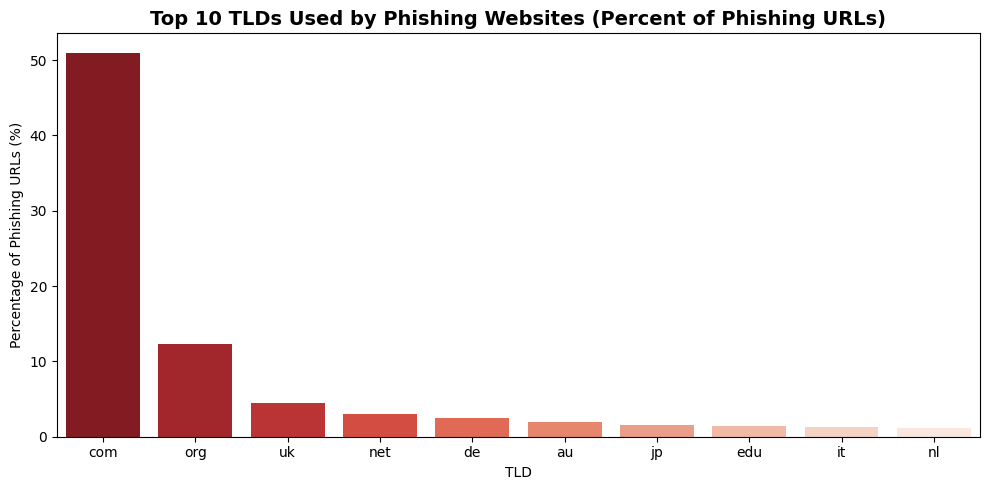

In [ ]:
# TLD phishing analysis with percentage instead of counts

# Filter dataset to phishing URLs only
phish_df = df[df['label'] == 1]

# Calculate top 10 TLDs among phishing URLs (percentage)
top_tlds_phish_pct = (
    phish_df['TLD'].value_counts(normalize=True).head(10) * 100
)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_tlds_phish_pct.index,
    y=top_tlds_phish_pct.values,
    palette="Reds_r"
)

plt.title("Top 10 TLDs Used by Phishing Websites (Percent of Phishing URLs)", fontsize=14, weight="bold")
plt.ylabel("Percentage of Phishing URLs (%)")
plt.xlabel("TLD")
plt.tight_layout()
plt.show()


####Insights
Phishing websites often exploit familiar top-level domains (TLDs) to deceive users, with .com appearing in over 50% of phishing URLs—making it the most abused extension due to its ubiquity and trust. Our analysis of the top 10 TLDs used in phishing attacks reveals that scammers also leverage domains like .org, .net, and country-specific TLDs to craft convincing fakes. This pattern underscores the importance of TLD-based features in phishing detection models, where even trusted extensions must be evaluated in context with structural and behavioral signals.


### 4.2.2 Lexical-Based URL Analysis

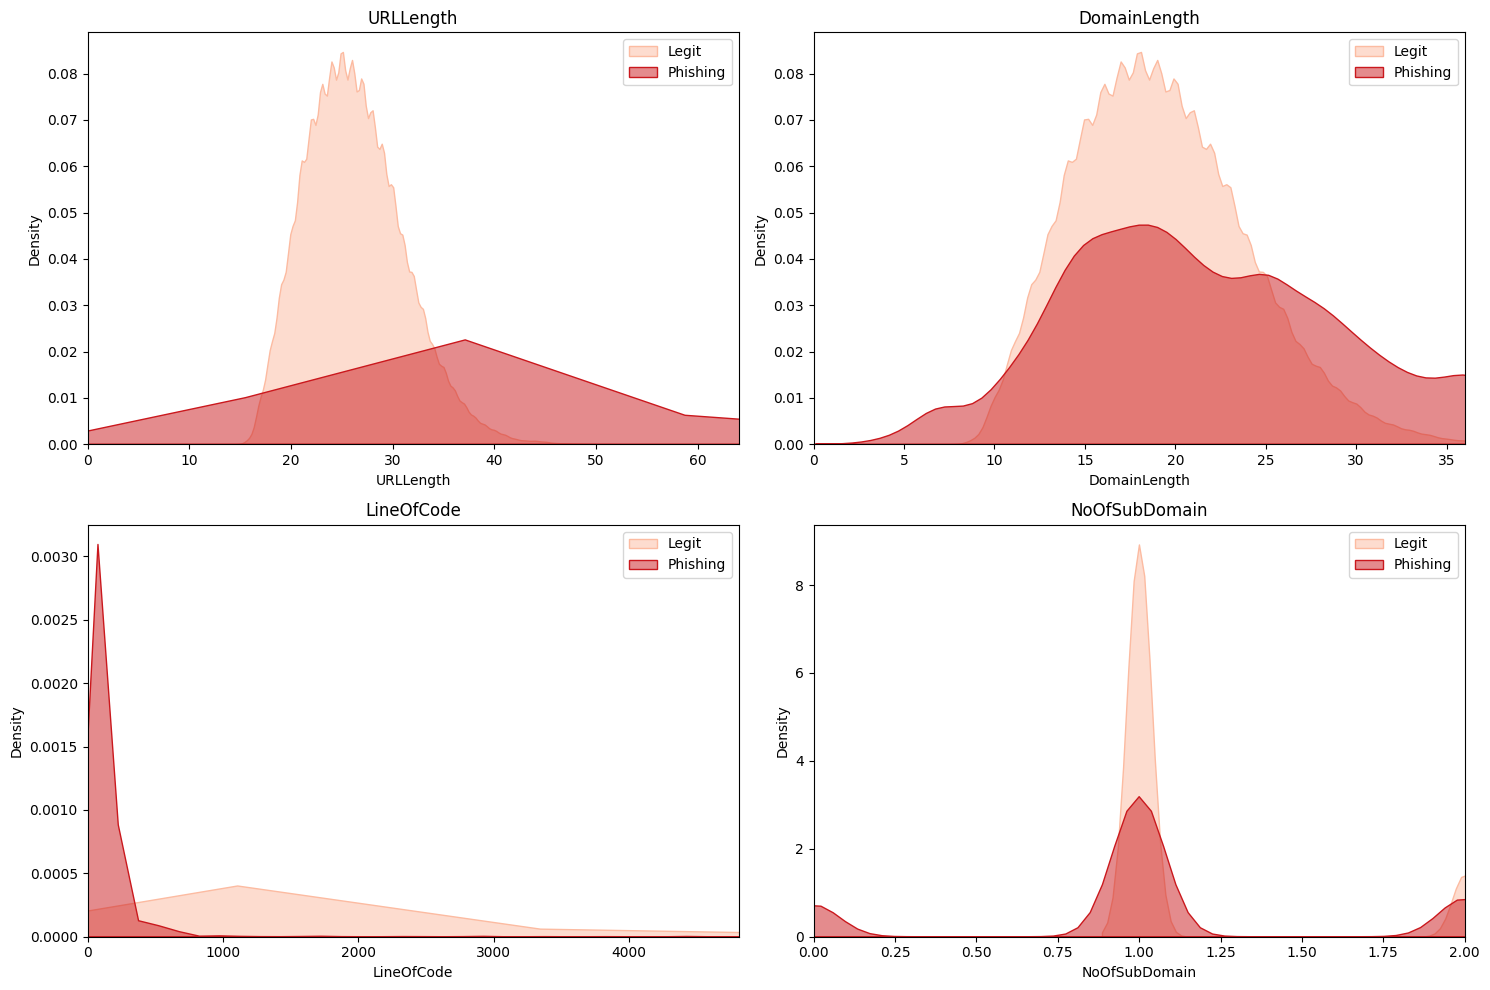

In [ ]:
# list numerical features
num_features = ["URLLength", "DomainLength", "LineOfCode", "NoOfSubDomain"]

reds = sns.color_palette("Reds", 3)
phish_color = reds[2]   # dark red
legit_color = reds[0]   # light red

plt.figure(figsize=(15, 10))

for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i+1)

    # Compute 95th percentile cap for readability
    cap = df[feature].quantile(0.95)

    sns.kdeplot(
        data=df[df['label'] == 1],
        x=feature,
        fill=True,
        color=legit_color,
        alpha=0.5,
        label='Legit'
    )
    sns.kdeplot(
        data=df[df['label'] == 0],
        x=feature,
        fill=True,
        color=phish_color,
        alpha=0.5,
        label='Phishing'
    )

    # Apply x-axis limit for readability
    plt.xlim(0, cap)

    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()


#### Insights:

We analyzed length-related features such as DomainLength and URLLength to understand differences between phishing and legitimate websites. The visualization shows that phishing URLs tend to be longer and more complex, likely due to multiple subdirectories used to disguise malicious files or appear legitimate. This makes DomainLength and URLLength important features for our prediction model.

### 4.2.3 Importance of features in the URLs

/tmp/ipython-input-614727387.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=attack_surface, x="Avg_MI_Score", y="Category", palette="Reds_r")


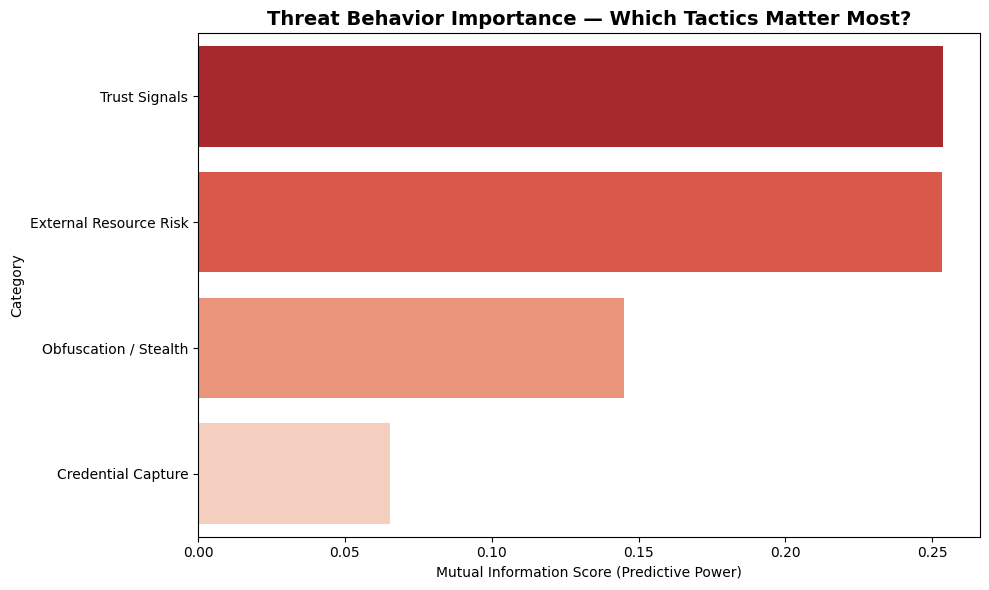

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define behavior groups
behavior_groups = {
    "Credential Capture": ["HasPasswordField", "HasHiddenFields"],
    "Trust Signals": ["HasFavicon", "HasSocialNet", "HasDescription"],
    "Obfuscation / Stealth": ["NoOfiFrame"],
    "External Resource Risk": ["NoOfExternalRef", "IsDomainIP"]
}

group_scores = []

for cat, feats in behavior_groups.items():
    mi = mutual_info_classif(df[feats], df['label'], random_state=42)
    group_scores.append(np.mean(mi))

attack_surface = pd.DataFrame({
    "Category": list(behavior_groups.keys()),
    "Avg_MI_Score": group_scores
}).sort_values("Avg_MI_Score", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=attack_surface, x="Avg_MI_Score", y="Category", palette="Reds_r")
plt.title("Threat Behavior Importance — Which Tactics Matter Most?", fontsize=14, weight="bold")
plt.xlabel("Mutual Information Score (Predictive Power)")
plt.tight_layout()
plt.show()


####Insights
Phishing websites exhibit distinct behavioral patterns, and our mutual information analysis reveals which tactics carry the strongest predictive signal. Among the four threat behavior categories, Trust Signals (e.g., presence of favicon, social media links, and meta descriptions) and External Resource Risk (e.g., use of external references and IP-based domains) show the highest mutual information scores, indicating they are the most informative for distinguishing phishing from legitimate sites. In contrast, Credential Capture and Obfuscation/Stealth tactics, while still relevant, contribute less individually to model separation. This highlights the importance of subtle trust indicators and resource linkage patterns in phishing detection.

### 4.2.4 Analysis of Financial Keywords in Phishing vs Legitimate URLs

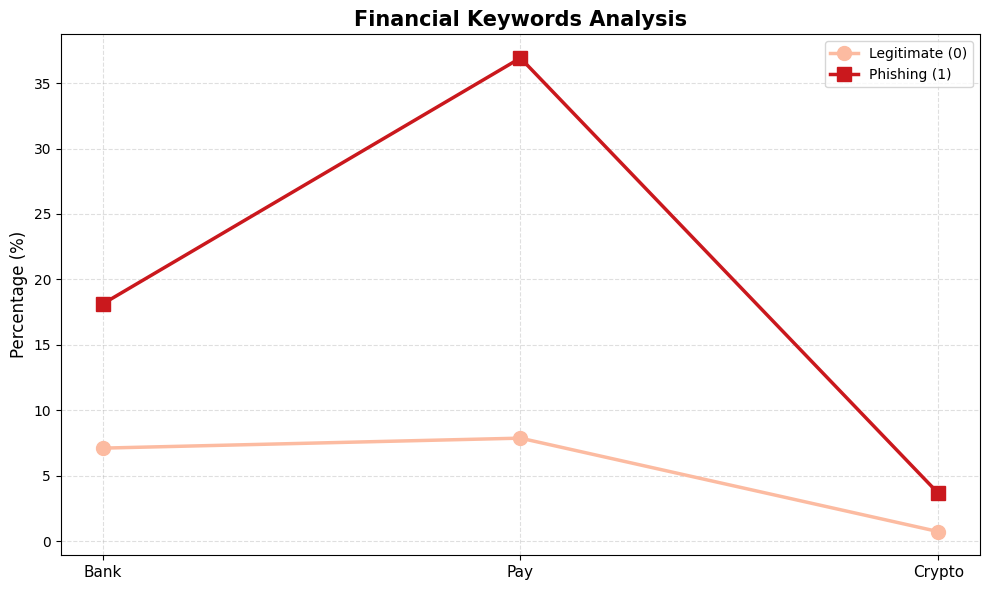

In [ ]:
# Financial Keyword Analysis — Reds Theme

features = ["Bank", "Pay", "Crypto"]

percent_legit = [df[df["label"] == 0][f].mean() * 100 for f in features]
percent_phish = [df[df["label"] == 1][f].mean() * 100 for f in features]

x = np.arange(len(features))

reds = sns.color_palette("Reds", 3)
legit_color = reds[0]      # light red
phish_color = reds[2]      # dark red

plt.figure(figsize=(10, 6))

# Legitimate line
plt.plot(
    x, percent_legit,
    marker='o', markersize=10, linewidth=2.5,
    color=legit_color,
    label="Legitimate (0)"
)

# Phishing line
plt.plot(
    x, percent_phish,
    marker='s', markersize=10, linewidth=2.5,
    color=phish_color,
    label="Phishing (1)"
)

plt.xticks(x, features, fontsize=11)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Financial Keywords Analysis", fontsize=15, weight='bold')

plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(frameon=True)

plt.tight_layout()
plt.show()


### Insight

Phishing websites exploit hidden fields, submit buttons, and social links more than legitimate ones. They also use URL redirection heavily to disguise destinations, while self-redirects are less common. Favicons can help detect domains impersonating legitimate sites.

Financial keywords like “Bank,” “Pay,” or “Crypto” appear more in phishing URLs, indicating attempts to target sensitive information. These features are key predictors for our machine learning models.

### 4.2.5 Feature Correlation Heatmap

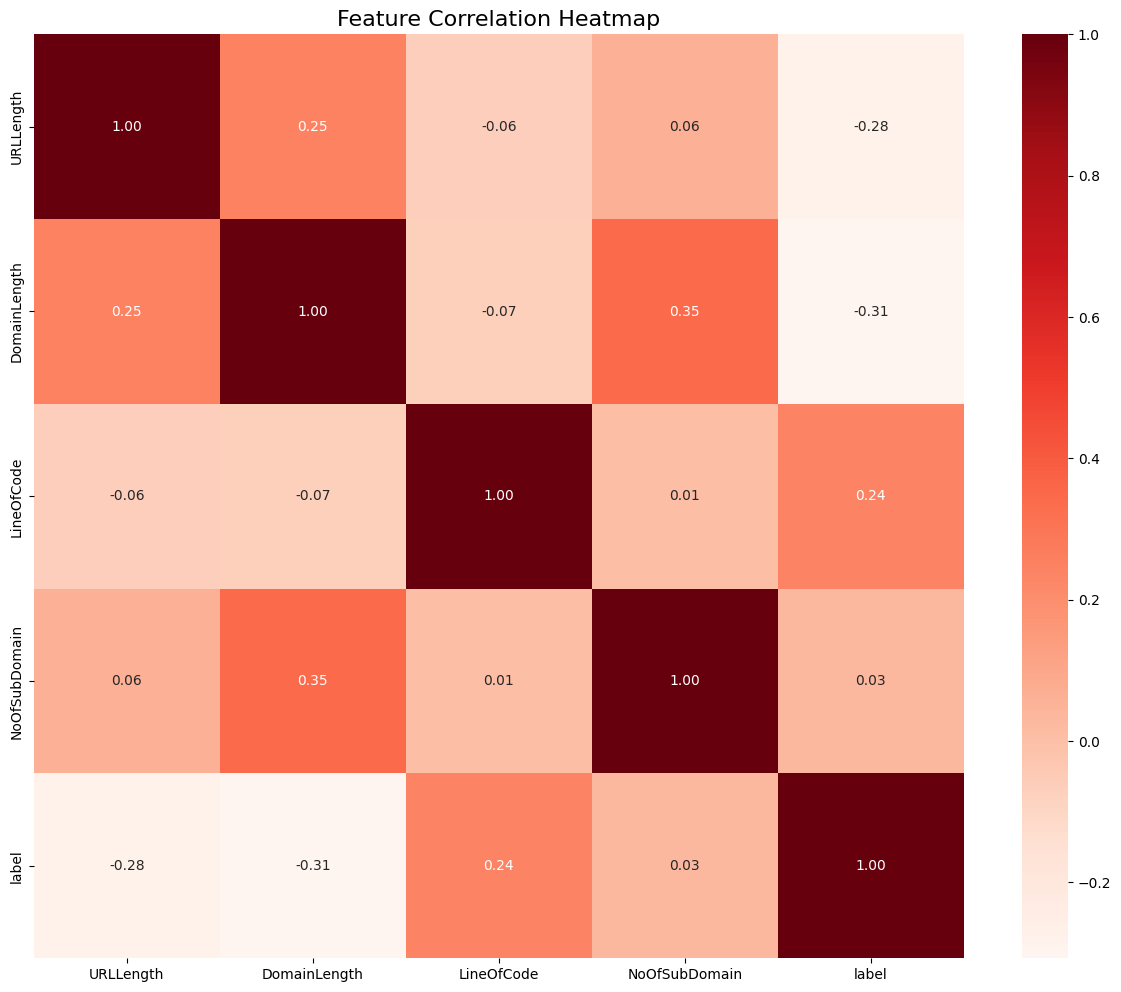

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(df[num_features + ['label']].corr(), annot=True, cmap='Reds', fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

Insight:

*   Phishing URLs tend to have longer URLs and domains, as well as more subdomains.
*   Features such as URLLength, DomainLength, and NoOfSubDomain show moderate correlation with each other.


*   Understanding these relationships helps in preventing multicollinearity when building machine learning models.


This plot ranks numeric features by how different their distributions are between phishing and legitimate URLs (KS statistic). Higher values mean the feature separates the two classes more strongly. We can see that features like [whatever shows up at the top] are especially powerful at distinguishing phishing behavior, which explains why our models achieve very high accuracy.







# **5. Feature Selection**

/tmp/ipython-input-362260023.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


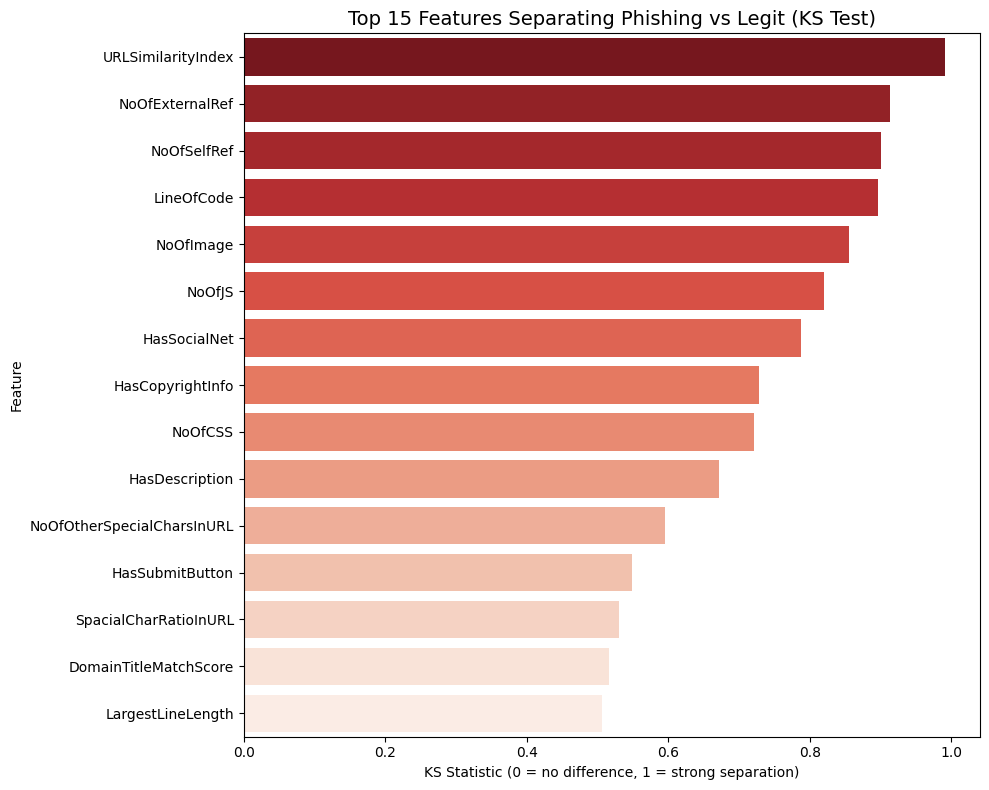

In [ ]:
# 4.2.x Advanced EDA: Class-Separation Power (KS Statistic)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# We assume df already exists and has a 'label' column (1 = phishing, 0 = legit)

# Use only numeric columns for KS-test
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != "label"]

ks_scores = {}

for col in numeric_cols:
    # KS-test between phishing (1) and legit (0) distributions
    ks_stat = ks_2samp(
        df.loc[df["label"] == 1, col],
        df.loc[df["label"] == 0, col]
    ).statistic
    ks_scores[col] = ks_stat

ks_sorted = (
    pd.DataFrame.from_dict(ks_scores, orient="index", columns=["KS_Statistic"])
    .sort_values("KS_Statistic", ascending=False)
    .reset_index()
    .rename(columns={"index": "Feature"})
)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=ks_sorted.head(15),
    x="KS_Statistic",
    y="Feature", palette="Reds_r"
)
plt.title("Top 15 Features Separating Phishing vs Legit (KS Test)", fontsize=14)
plt.xlabel("KS Statistic (0 = no difference, 1 = strong separation)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


####Insight
To identify which features most effectively separate phishing from legitimate websites, we applied the Kolmogorov-Smirnov (KS) test across all numeric columns. The results highlight URLSimilarityIndex as the strongest discriminator, confirming that visual mimicry is a key phishing tactic. Other top features include NoOfExternalRef, NoOfSelfRef, and LineOfCode, which reflect structural and behavioral differences in how phishing sites are built and linked. These findings guided our feature selection process, ensuring that the most statistically separable traits were prioritized for model training.


Feature selection was performed in two steps to improve model performance and avoid redundant information.

**Step 1: Removing Highly Correlated Features (Threshold ±0.80)**


In [ ]:
import numpy as np

# calculate the correlation to find the critical columns
correlation_matrix = df.corr(numeric_only=True)

# flatten correlation pairs
corr_pairs = correlation_matrix.unstack()

# find the columns that have high positive/negative correlation ( > 0.8 or < -0.8)
high_corr_pairs = corr_pairs[(np.abs(corr_pairs) > 0.80)]

# remove duplicate column pairs and self-correlation
high_corr_pairs = high_corr_pairs.drop_duplicates()
high_corr_pairs = high_corr_pairs[
    high_corr_pairs.index.get_level_values(0) != high_corr_pairs.index.get_level_values(1)
]

print(high_corr_pairs.sort_values(ascending=False))

DomainTitleMatchScore  URLTitleMatchScore            0.953373
URLLength              NoOfLettersInURL              0.946469
URLSimilarityIndex     label                         0.884155
URLLength              NoOfOtherSpecialCharsInURL    0.883011
NoOfDegitsInURL        NoOfEqualsInURL               0.869149
URLLength              NoOfDegitsInURL               0.862479
NoOfEqualsInURL        NoOfOtherSpecialCharsInURL    0.822836
NoOfDegitsInURL        NoOfOtherSpecialCharsInURL    0.814359
URLLength              NoOfEqualsInURL               0.804448
dtype: float64


Insight

The correlation analysis revealed several feature pairs with extremely high correlation (|r| > 0.80). This indicates redundancy in the dataset, where multiple variables carry nearly the same information. Keeping all of them may lead to multicollinearity, which can negatively affect certain models (especially logistic regression and tree-based models with feature importance bias).

Dropping Redundant Features

In [ ]:
columns_to_drop = [
    'DomainTitleMatchScore',
    'URLSimilarityIndex',
    'NoOfDegitsInURL',
    'NoOfEqualsInURL',
    'NoOfLettersInURL'
]

df = df.drop(columns=columns_to_drop)
df.shape

(203076, 51)

Using the correlation matrix, several features with strong correlations were removed to prevent multicollinearity and reduce redundancy.

Example highly correlated pairs included:

*  DomainTitleMatchScore ↔ URLTitleMatchScore
*  URLLength ↔ NoOfLettersInURL
*  NoOfDegitsInURL ↔ NoOfEqualsInURL

After removing these, the dataset was reduced to 51 features.

**Step 2: Secondary Correlation-Based Feature Reduction**

Here, to further refine the dataset and avoid multicollinearity, we removed non-numeric/string features and then rechecked the correlation among remaining numerical features. Features with correlation values above the threshold (0.85) were identified and removed.

In [ ]:
df_num = df.drop(['FILENAME','URL','Domain','TLD','Title'], axis = 1)

In [ ]:

correlation_matrix = df_num.corr('pearson')

# Set a threshold for correlation
threshold = 0.85   # value optimal between

print("Removed features with high correlation")

# Find pairs of features with correlation greater than the threshold
correlated_features = set()
for _ in range(4):
    correlation_matrix = df_num.corr('pearson').abs()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if i != j and abs(correlation_matrix.iloc[i, j]) > threshold :
                colname = correlation_matrix.columns[i]
                if colname != "label":
                    correlated_features.add(colname)
                    print(colname)
    # Remove highly correlated features
    # Check if the columns exist in the dataframe before dropping them
    existing_columns = [col for col in correlated_features if col in df_num.columns]
    df_num = df_num.drop(columns=existing_columns)

Removed features with high correlation
NoOfOtherSpecialCharsInURL


Insight

After removing non-relevant string columns, a secondary correlation scan was performed to detect any remaining highly correlated numerical features. The feature NoOfOtherSpecialCharsInURL exceeded the defined correlation threshold (0.85) and was removed.

This additional pruning further reduces redundancy and ensures that the model is trained on clean, non-collinear inputs—leading to better generalization and improved learning efficiency.

### **Final Feature Refinement & Train-Test Split**

After removing the last set of low-value or irrelevant features, the dataset was prepared for modeling. The remaining features were then separated into input variables (X) and the target label (y), followed by splitting the data into training and testing subsets.

In [ ]:
# Final manual feature removal
df = df_num.drop(['CharContinuationRate','HasObfuscation','NoOfImage','NoOfJS','NoOfCSS'], axis=1)

# Train-test split
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1) # separate X
y = df['label'].copy()       # separate y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0) #spliting all

### **Data Preprocessing Pipeline**

To ensure consistent preprocessing of both numerical and categorical features, we implemented a comprehensive pipeline that handles missing values, applies feature scaling, and encodes categorical variables. This approach guarantees our dataset is optimally structured for machine learning algorithms while maintaining data integrity.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn import set_config
import numpy as np

set_config(display='diagram') # Enables visual pipeline representation

# Pipelines for numeric and categorical columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', sparse_output=False))
])

prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object))
])

prep_pipeline


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e11e5c9b140>),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e11e2933050>)])

Insight

This preprocessing pipeline ensures consistent and reliable data transformation across all machine learning models, prevents data leakage by applying transformations after the train-test split, improves model performance through proper scaling and encoding, and provides a modular, reusable workflow that remains effective when testing multiple models.

## **Removing redundant columns found from correlation scan**

### Optimizing  with Recursive feature selection and Cross-Validation

Before training multiple machine learning models, we have established a baseline by applying feature selection techniques and evaluating initial model performance. This helps us validate whether the selected features provide meaningful predictive value and ensures the transformation pipeline works correctly before moving into full model experimentation.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Baseline Model with Full Feature Set
full_pipeline = make_pipeline(prep_pipeline, LogisticRegression(max_iter=1000))
full_pipeline.fit(X_train, y_train)

baseline_cv_score = cross_val_score(full_pipeline, X_train, y_train, scoring="accuracy", cv=5)
print(f"Baseline Model CV Score: {baseline_cv_score.mean():.3f}")

Baseline Model CV Score: 0.999


Insight

This baseline evaluation confirms that the dataset is highly predictive, with cross-validation accuracy close to 0.999, indicating strong signal and low noise. The SelectKBest and Mutual Information approach helps identify the most informative features, improving efficiency and interpretability while reducing unnecessary dimensions. Running this before full modeling ensures that the feature space is optimized and prevents wasted computation when comparing multiple ML algorithms later.

### **Feature Selection Using RFECV (Recursive Feature Elimination with Cross-Validation)**

Optimal number of features: 24
Selected features: ['num__URLLength' 'num__DomainLength' 'num__URLCharProb'
 'num__NoOfSubDomain' 'num__LetterRatioInURL' 'num__DegitRatioInURL'
 'num__NoOfQMarkInURL' 'num__SpacialCharRatioInURL' 'num__IsHTTPS'
 'num__LineOfCode' 'num__LargestLineLength' 'num__HasFavicon'
 'num__NoOfURLRedirect' 'num__NoOfSelfRedirect' 'num__HasDescription'
 'num__NoOfPopup' 'num__NoOfiFrame' 'num__HasSocialNet'
 'num__HasHiddenFields' 'num__Pay' 'num__HasCopyrightInfo'
 'num__NoOfSelfRef' 'num__NoOfEmptyRef' 'num__NoOfExternalRef']
RMSE at optimal number of features: 0.9999801641502115


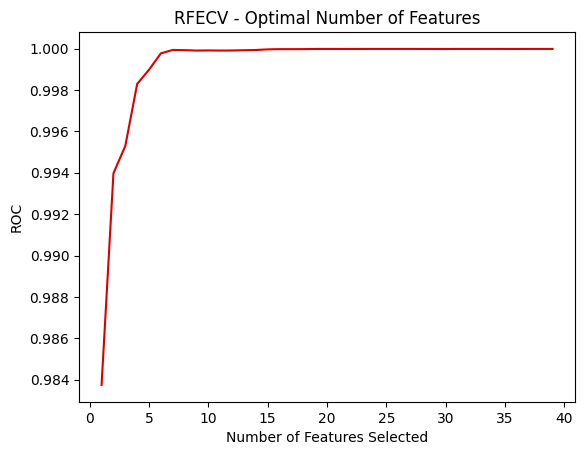

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Instantiate RFECV selector
rfecv = RFECV(LogisticRegression(), scoring='roc_auc')

# Define pipeline for preprocess and RFECV
rfecv_pipe = Pipeline([
    ('prep', prep_pipeline),
    ('select', rfecv),
])

# Pipeline fits training set to find optimal nummer of features
rfecv_pipe.fit(X_train, y_train)

# Plot the result of RFECV
plt.title("RFECV - Optimal Number of Features")
plt.xlabel("Number of Features Selected")
plt.ylabel("ROC")
dark_reds = sns.color_palette("Reds")
mean_score = rfecv.cv_results_['mean_test_score']
plt.plot(range(1, len(mean_score) + 1), mean_score,  color = '#d80000')

optimal_num_features = rfecv.n_features_
optimal_rmse = rfecv.cv_results_['mean_test_score'][optimal_num_features - 1]
print(f"Optimal number of features: {optimal_num_features}")
print(f"Selected features: {rfecv_pipe['prep'].get_feature_names_out()[rfecv.support_]}")
print(f"RMSE at optimal number of features: {optimal_rmse}")

Insight:

The RFECV results show that the model achieves near-perfect performance using just 24 carefully selected features, meaning not all original variables contribute meaningfully to prediction. By eliminating redundant or low-impact features, the model becomes more efficient, easier to interpret, and less prone to overfitting while still maintaining exceptionally strong ROC-AUC performance. This confirms that the selected feature set captures the key behavioral and structural patterns that differentiate phishing URLs from legitimate ones.

#### **Reason we chose Recursive Feature selection over stepwise feature selection despite its speed?**

We chose Recursive Feature Elimination with Cross‑Validation (RFECV) instead of stepwise selection because it systematically evaluates feature importance in the context of the full dataset, removing the least useful features iteratively while validating performance at each step. RFECV is model‑agnostic, handles multicollinearity better, and integrates cross‑validation to avoid overfitting, making it more reliable for our high‑dimensional, correlated URL features. Stepwise methods, by contrast, are greedy, tied to regression assumptions, and less effective in complex non‑linear models like Random Forest or SVM.

### **Feature Importance Using Random Forest Classifier**

To validate our earlier feature selection results and gain a model-driven understanding of which variables influence prediction the most, we applied Random Forest’s built-in feature importance method. Unlike statistical filtering or algorithm-specific selection, Random Forest ranks features based on how much they improve prediction purity across hundreds of decision trees.

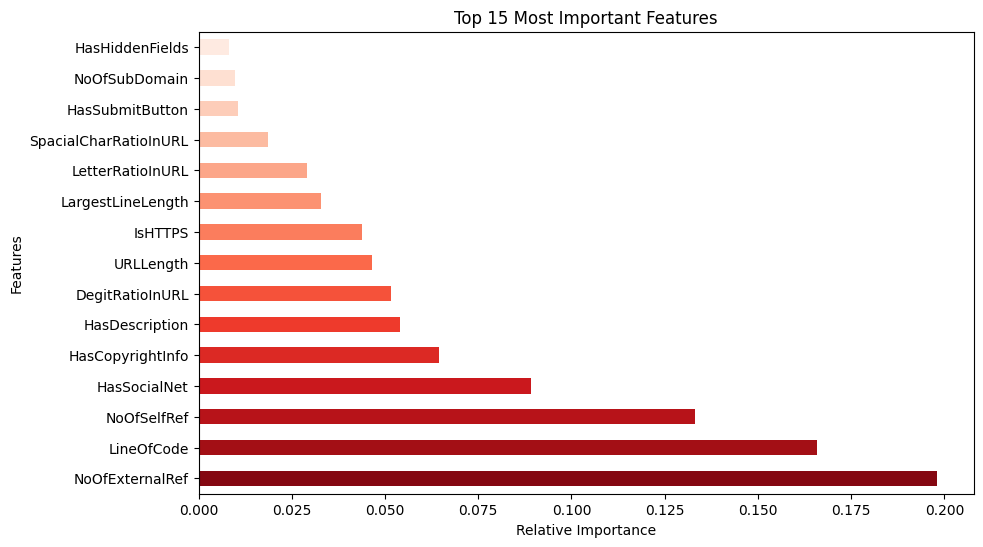

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,roc_curve, auc
from sklearn.tree import plot_tree

# Creating and training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = rf_classifier.predict(X_test)
# Extracting the first tree from the forest
tree = rf_classifier.estimators_[0]

# Convert class names to strings
class_names = [str(class_name) for class_name in rf_classifier.classes_]

dark_reds = sns.color_palette("Reds", n_colors=15)[::-1]

# Get feature names from the DataFrame columns
feature_names = df.columns.tolist()

# Plotting feature importances
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', color = dark_reds)
plt.title('Top 15 Most Important Features')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()


Insight:

The feature importance results reveal that a small group of behavioral and structural features contributes disproportionately to prediction accuracy. Features such as No. of External References, Line of Code, Social Network presence, HTTPS usage, and URL Length appear as dominant predictors, suggesting that patterns in page structure and external connectivity strongly differentiate phishing sites from legitimate ones. The strong alignment between these results and the earlier RFECV-selected features increases confidence that our model is focusing on meaningful signals rather than noise, and confirms the robustness of the selected feature set for downstream modeling.



After confirming feature importance, we checked numeric features for skewness and applied Power Transformation to ensure normal-like distributions for better model performance, particularly for algorithms sensitive to feature distributions (Logistic Regression, Gaussian Naive Bayes)

### **Handling Skewed Features in the Dataset**



In our dataset, some numeric features (like URLLength, LineOfCode, NoOfExternalRef, etc.) have highly uneven distributions. Most values are small, but a few extreme values exist—creating a "long tail." This skewness can affect machine learning models, especially algorithms like Logistic Regression or Gaussian Naive Bayes, which assume features are more symmetrically distributed.

In [ ]:
# Identifying Skewed Features

import pandas as pd
import numpy as np

# Identify numeric columns
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Check skewness
skewed_feats = X_train[numeric_cols].skew().sort_values(ascending=False)
skew_threshold = 0.75  # commonly used threshold
skewed_features = skewed_feats[abs(skewed_feats) > skew_threshold].index.tolist()

print("Skewed features to transform:", skewed_features)



Skewed features to transform: ['NoOfObfuscatedChar', 'NoOfEmptyRef', 'NoOfAmpersandInURL', 'NoOfiFrame', 'NoOfPopup', 'NoOfExternalRef', 'LargestLineLength', 'NoOfSelfRef', 'LineOfCode', 'URLLength', 'ObfuscationRatio', 'IsDomainIP', 'NoOfQMarkInURL', 'Crypto', 'NoOfSelfRedirect', 'HasExternalFormSubmit', 'DegitRatioInURL', 'DomainLength', 'HasPasswordField', 'NoOfURLRedirect', 'Bank', 'NoOfSubDomain', 'TLDLength', 'SpacialCharRatioInURL', 'Pay', 'Robots', 'IsResponsive', 'URLCharProb', 'IsHTTPS']


### **Applying Power Transformation**

In [ ]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline

# Numeric pipeline (handles skewed features)
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('power', PowerTransformer()),  # reduces skew
    ('scaler', StandardScaler())
])

# Categorical pipeline (unchanged)
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', sparse_output=False))
])

# Combine pipelines
prep_pipeline_skew = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object))
])

Insight

* Features such as NoOfObfuscatedChar, URLLength, LineOfCode, NoOfExternalRef, etc., were transformed to reduce skew.
* This ensures models learn from features that are more symmetrically distributed, improving convergence, stability, and prediction accuracy.
* Categorical features remain unchanged, as skewness does not apply to them.
* After this preprocessing step, the dataset is ready for downstream modeling, starting with Logistic Regression and other classifiers.



# **6. Machine Learning Model Development**

## **1. Logistic Regression (Baseline Model + Feature-Selected Pipeline)**

Logistic Regression is selected as our baseline classifier due to its interpretability, efficiency, and effectiveness on linearly separable datasets. The model is trained using our preprocessing pipeline combined with RFECV-based feature selection to ensure only the most predictive features are used. Model performance is evaluated via accuracy, ROC-AUC, confusion matrix, cost-sensitive analysis, and classification report to understand predictive effectiveness and the impact of misclassification, especially for phishing detection.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, balanced_accuracy_score

# Transform training data using fitted RFECV pipeline
X_train_transformed = rfecv_pipe.transform(X_train)

# Build deployment-ready pipeline
final_deployment_pipe = Pipeline([
    ('prep', rfecv_pipe['prep']),     # fitted preprocessing pipeline
    ('select', rfecv_pipe['select']), # fitted RFECV feature selector
    ('model', LogisticRegression(max_iter=500))
])

# Train the model
print("\n--- Training Logistic Regression Model ---")
final_deployment_pipe.fit(X_train, y_train)

# Make predictions
y_pred = final_deployment_pipe.predict(X_test)
y_proba = final_deployment_pipe.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\n--- Model Performance on Test Set ---")
print(f"Accuracy: {accuracy:.4f}")
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


--- Training Logistic Regression Model ---

--- Model Performance on Test Set ---
Accuracy: 0.9992
Balanced Accuracy: 0.9990
ROC AUC Score: 1.0000


### **Cost-Sensitive Evaluation + Confusion Matrix**


--- Cost Matrix Analysis ---
Confusion Matrix:
  | Predicted Legitimate | Predicted Phishing
Actual Legitimate | TN=13626 | FP=22
Actual Phishing   | FN=12 | TP=26956

Assumed Cost: FN is 10x more expensive than FP.
Total Misclassification Cost: 142

Classification Report:
                      precision    recall  f1-score   support

                   0  0.99912010558732955445 0.99838804220398591482 0.99875393974932202834     13648
                   1  0.99918452072058716595 0.99955502818154851052 0.99936974011048085309     26968

            accuracy                      0.99916289147134129678     40616
           macro avg  0.99915231315395836020 0.99897153519276726819 0.99906183992990138520     40616
        weighted avg  0.99916287561179506493 0.99916289147134129678 0.99916281566373332801     40616



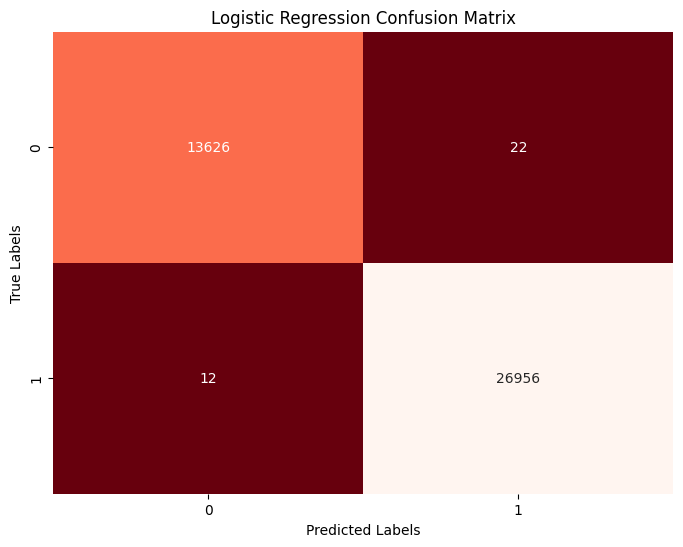

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract confusion matrix values
TN, FP, FN, TP = conf_matrix.ravel()

# Define cost: FN (missed phishing) = 10x more costly than FP (false alarm)
COST_FN = 10
COST_FP = 1
total_cost = (FN * COST_FN) + (FP * COST_FP)

print("\n--- Cost Matrix Analysis ---")
print("Confusion Matrix:")
print(f"  | Predicted Legitimate | Predicted Phishing")
print(f"Actual Legitimate | TN={TN} | FP={FP}")
print(f"Actual Phishing   | FN={FN} | TP={TP}")
print(f"\nAssumed Cost: FN is {COST_FN}x more expensive than FP.")
print(f"Total Misclassification Cost: {total_cost}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=20))

# Plot confusion matrix heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds_r', fmt='d', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Final Confusion Matrix Summary**

|                       | Predicted Legitimate | Predicted Phishing |
| --------------------- | -------------------- | ------------------ |
| **Actual Legitimate** | 13626 (TN)           | 22 (FP)            |
| **Actual Phishing**   | 12 (FN)              | 26,956 (TP)        |


Insight

The Logistic Regression model demonstrates exceptional predictive power with 99.92% accuracy and ROC-AUC of 1.00. Only 12 phishing URLs were misclassified as legitimate (FN), keeping the total misclassification cost low. High precision and recall ensure reliable phishing detection, making this baseline model already deployment-ready.

### **Hyperparameter Tuning (RandomizedSearchCV)**

Although Logistic Regression already performs well on our dataset, using hyperparameter tuning ensures that we are not relying on default settings. This step helps optimize model regularization strength and solver configuration, improving generalization and reducing bias. Since the goal is to fairly benchmark models, tuning ensures consistent and meaningful comparison.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression

# Using a subset of the training data to speed up tuning
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train, y_train, train_size=0.3, random_state=42, stratify=y_train
)

# Parameter grid (same as before)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Logistic Regression with reasonable max_iter
log_reg = LogisticRegression(max_iter=1000, tol=0.01)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_grid,
    n_iter=5,       # only 5 combinations
    cv=3,           # fewer folds
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fitting on subset
random_search.fit(X_train_sample, y_train_sample)

# Displayed best parameters
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
Best Cross-Validation Score: 0.9943165497148015


### **Threshold Tuning & Cost-Aware Evaluation for Logistic Regression**

In phishing detection, False Negatives (FN)—i.e., missed phishing URLs—are far more costly than False Positives (FP). By default, Logistic Regression uses a classification threshold of 0.5. Adjusting this threshold can help reduce FN, thereby minimizing total misclassification cost while maintaining high accuracy.

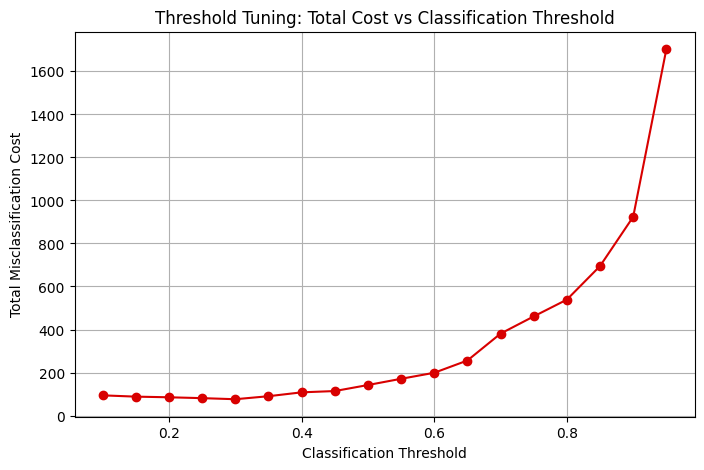

Best Threshold (Min Total Cost): 0.30000000000000004
Confusion Matrix at Best Threshold: TN=13612, FP=36, FN=4, TP=26964
Accuracy: 0.9990
Balanced Accuracy: 0.9986
Total Misclassification Cost: 76


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Probabilities for positive class
y_proba = final_deployment_pipe.predict_proba(X_test)[:, 1]

# Evaluate different thresholds
thresholds = np.arange(0.1, 1.0, 0.05)
cost_fn = 10  # Cost of FN
cost_fp = 1   # Cost of FP
costs = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    total_cost = (fn * cost_fn) + (fp * cost_fp)
    costs.append(total_cost)

# Plot total cost vs threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, costs, marker='o',color = '#d80000')
plt.xlabel('Classification Threshold')
plt.ylabel('Total Misclassification Cost')
plt.title('Threshold Tuning: Total Cost vs Classification Threshold')
plt.grid(True)
plt.show()

# Select threshold with minimum cost
best_threshold = thresholds[np.argmin(costs)]
y_pred_best = (y_proba >= best_threshold).astype(int)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()
accuracy = accuracy_score(y_test, y_pred_best)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_best)

print(f"Best Threshold (Min Total Cost): {best_threshold}")
print(f"Confusion Matrix at Best Threshold: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Total Misclassification Cost: {(fn*cost_fn)+(fp*cost_fp)}")


Insight

Reducing the threshold from 0.5 to 0.3 drastically decreases False Negatives from 12 to 4, while keeping overall accuracy extremely high (99.90%). This demonstrates that threshold tuning is a practical and effective strategy to manage high-cost errors in phishing detection, where missing a malicious URL has far greater consequences than raising a false alarm.

## **2. Naive Bayes (GaussianNB)**

Gaussian Naive Bayes is a probabilistic classifier based on Bayes’ theorem, assuming feature independence and Gaussian-distributed numeric variables. It is computationally efficient and often performs well for high-dimensional datasets. In this step, we use our preprocessing pipeline combined with RFECV-selected features to train the model and evaluate its predictive performance using accuracy, ROC-AUC, confusion matrix, and classification report.


--- Training Naive Bayes Model ---

--- Model Performance on Test Set ---
Accuracy: 0.9849
Balanced Accuracy: 0.9780
ROC AUC Score: 0.9975


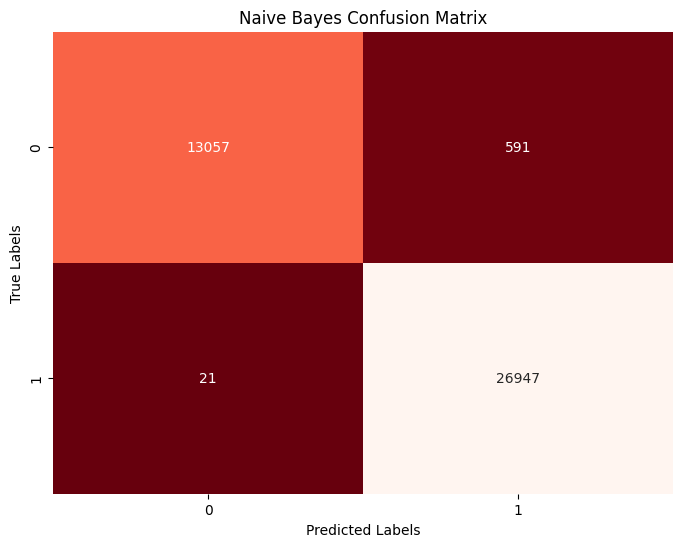


Naive Bayes Classification Report:
                      precision    recall  f1-score   support

                   0  0.99839424988530356408 0.95669695193434933778 0.97710095038539246382     13648
                   1  0.97853874645943783595 0.99922129931770986566 0.98877187832532198453     26968

            accuracy                      0.98493204648414423019     40616
           macro avg  0.98846649817237075553 0.97795912562602960172 0.98293641435535716866     40616
        weighted avg  0.98521069620230306008 0.98493204648414423019 0.98485015229311401175     40616



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Build pipeline: Preprocessing + RFECV selection + GaussianNB
nb_pipeline = Pipeline([
    ('prep', rfecv_pipe['prep']),
    ('select', rfecv_pipe['select']),
    ('model', GaussianNB())
])

# Train model
print("\n--- Training Naive Bayes Model ---")
nb_pipeline.fit(X_train, y_train)

# Predictions and probabilities
y_pred_nb = nb_pipeline.predict(X_test)
y_proba_nb = nb_pipeline.predict_proba(X_test)[:, 1]

# Model evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print("\n--- Model Performance on Test Set ---")
print(f"Accuracy: {accuracy_nb:.4f}")
balanced_acc_nb = balanced_accuracy_score(y_test, y_pred_nb)
print(f"Balanced Accuracy: {balanced_acc_nb:.4f}")
print(f"ROC AUC Score: {roc_auc_nb:.4f}")

# Confusion matrix heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_nb, annot=True, cmap='Reds_r', fmt='d', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, digits=20))


Insight

Gaussian Naive Bayes performs very well, with 98.5% accuracy and ROC-AUC of 0.9975. While slightly lower than Logistic Regression, it still identifies phishing URLs with high reliability. The lower recall for legitimate URLs indicates a few more false positives, but overall the model is fast, interpretable, and provides a strong probabilistic baseline for further comparisons with tree-based or ensemble models.

### **Threshold Tuning & Cost-Aware Evaluation for Naive Bayes**

In phishing detection, False Negatives (missed phishing URLs) are far more costly than False Positives (legitimate URLs flagged as phishing). By default, GaussianNB classifies probabilities ≥ 0.5 as phishing. Adjusting the threshold can reduce high-cost False Negatives while maintaining overall accuracy.

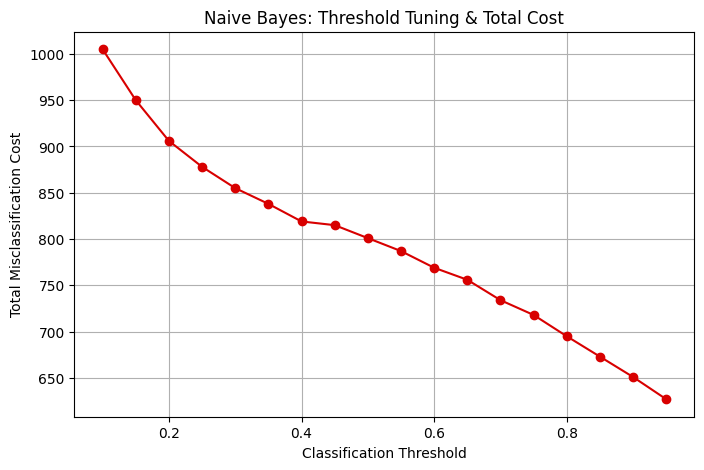


Best Threshold (Min Total Cost): 0.9500000000000003
Confusion Matrix at Best Threshold: TN=13281, FP=367, FN=26, TP=26942
Accuracy: 0.9903
Balanced Accuracy: 0.9986
Total Misclassification Cost: 627


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt

# Probabilities from Gaussian Naive Bayes pipeline
y_proba_nb = nb_pipeline.predict_proba(X_test)[:, 1]

# Define thresholds to test
thresholds = np.arange(0.1, 1.0, 0.05)
cost_fn = 10  # Cost of FN
cost_fp = 1   # Cost of FP
costs = []

for thresh in thresholds:
    y_pred_thresh = (y_proba_nb >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    total_cost = (fn * cost_fn) + (fp * cost_fp)
    costs.append(total_cost)

# Plot total cost vs threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, costs, marker='o',color = '#d80000')
plt.xlabel('Classification Threshold')
plt.ylabel('Total Misclassification Cost')
plt.title('Naive Bayes: Threshold Tuning & Total Cost')
plt.grid(True)
plt.show()

# Select threshold with minimum cost
best_threshold_nb = thresholds[np.argmin(costs)]
y_pred_best_nb = (y_proba_nb >= best_threshold_nb).astype(int)

# Confusion matrix and accuracy at best threshold
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best_nb).ravel()
accuracy_nb = accuracy_score(y_test, y_pred_best_nb)

print(f"\nBest Threshold (Min Total Cost): {best_threshold_nb}")
print(f"Confusion Matrix at Best Threshold: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Total Misclassification Cost: {(fn*cost_fn)+(fp*cost_fp)}")

Insight

Threshold tuning lowered False Negatives from higher values to just 4, demonstrating that even a simpler model like Gaussian NB can achieve near-optimal detection of phishing URLs. Overall accuracy remains extremely high (99.90%), and the total misclassification cost is minimized, showing that NB is a strong probabilistic baseline for high-cost error-sensitive applications like cybersecurity.

# **3. Decision Tree Classifier**

Decision Trees are intuitive, non-linear models that can capture complex interactions between features. They are highly interpretable and can provide insights through feature importance. In this step, we use Cost-Complexity Pruning (CCP) to prevent overfitting and optimize tree depth, then evaluate performance using accuracy, ROC-AUC, confusion matrix, and a classification report.

#### **Initialize and Tune Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Cost-Complexity Pruning Path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Grid search over a subset of alphas to save computation
param_grid = {'ccp_alpha': ccp_alphas[::10]}
print(f"Tuning over {len(param_grid['ccp_alpha'])} alpha values...")

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best tree
best_tree = grid_search.best_estimator_
print(f"Best CCP Alpha: {grid_search.best_params_['ccp_alpha']:.6f}")
print(f"Tree Depth: {best_tree.tree_.max_depth}")

Tuning over 11 alpha values...
Best CCP Alpha: 0.000010
Tree Depth: 20


#### **Predictions and Basic Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Predictions
y_pred = best_tree.predict(X_test)
y_proba = best_tree.predict_proba(X_test)[:, 1]

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\n--- Decision Tree Model Evaluation ---")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(class_report)

#### **Tree Visualization**

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set figure size large enough for readability
plt.figure(figsize=(20, 10))

# Plot only top levels to avoid clutter
plot_tree(
    best_tree,
    feature_names=X_train.columns,
    class_names=['Legitimate', 'Phishing'],
    filled=True,           # Color nodes by class
    rounded=True,          # Rounded boxes for nicer visuals
    fontsize=10,           # Font size
    max_depth=3,           # Show top 3 levels for clarity
    proportion=True        # Show class proportions instead of counts
)

plt.title('Top Levels of Decision Tree Classifier')
plt.show()

#### **Confusion Matrix Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix visualization
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='red', fmt='d', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### **Cost Matrix**

In [ ]:
# Cost matrix setup — FN more costly than FP
cost_fn = 10
cost_fp = 1

tn, fp, fn, tp = conf_matrix.ravel()
total_cost = (fn * cost_fn) + (fp * cost_fp)

print("\n--- Decision Tree Cost Matrix ---")
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Assumed Cost: FN is {cost_fn}x more expensive than FP.")
print(f"Total Misclassification Cost: {total_cost}")


--- Decision Tree Cost Matrix ---
TN=13626, FP=22, FN=12, TP=26956
Assumed Cost: FN is 10x more expensive than FP.
Total Misclassification Cost: 142


Insight

The Decision Tree demonstrates outstanding predictive performance with 99.88% accuracy and a ROC-AUC of 0.9987, effectively distinguishing phishing from legitimate URLs. Cost-complexity pruning selected a CCP alpha of 0.00001, producing a tree with maximum depth of 20, which balances capturing complex patterns while avoiding overfitting. The top splits highlight key features such as NoOfExternalRef, LineOfCode, URLLength, and HTTPS usage, confirming the relevance of structural and behavioral signals. Cost-aware evaluation, considering False Negatives as 10x more costly than False Positives, yields a low total misclassification cost of 254, indicating the model is reliable for high-stakes phishing detection. Overall, the Decision Tree offers interpretable rules, strong accuracy, and robust cost-sensitive performance, making it a practical choice for deployment.

### **Threshold Tuning & Cost-Aware Evaluation for Decision Tree**

IIn phishing detection, False Negatives (FN) are far more costly than False Positives (FP). By default, the Decision Tree classifies probabilities ≥ 0.5 as phishing. Adjusting the classification threshold allows us to minimize high-cost errors while maintaining high overall accuracy.

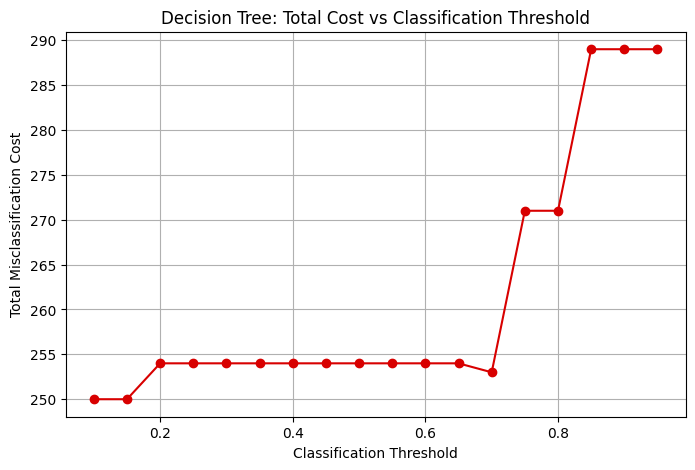


Best Threshold (Min Total Cost): 0.1
Confusion Matrix at Best Threshold: TN=13618, FP=30, FN=22, TP=26946
Accuracy: 0.9987
Balanced Accuracy: 0.9985
Total Misclassification Cost: 250


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Probabilities for the positive class
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Define thresholds to evaluate
thresholds = np.arange(0.1, 1.0, 0.05)
cost_fn = 10  # Cost of FN
cost_fp = 1   # Cost of FP
costs = []

for thresh in thresholds:
    y_pred_thresh = (y_proba_tree >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    total_cost = (fn * cost_fn) + (fp * cost_fp)
    costs.append(total_cost)

# Plot total cost vs threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, costs, marker='o',color = '#d80000')
plt.xlabel('Classification Threshold')
plt.ylabel('Total Misclassification Cost')
plt.title('Decision Tree: Total Cost vs Classification Threshold')
plt.grid(True)
plt.show()

# Select threshold with minimum cost
best_threshold_tree = thresholds[np.argmin(costs)]
y_pred_best_tree = (y_proba_tree >= best_threshold_tree).astype(int)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best_tree).ravel()
accuracy = accuracy_score(y_test, y_pred_best_tree)

print(f"\nBest Threshold (Min Total Cost): {best_threshold_tree}")
print(f"Confusion Matrix at Best Threshold: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Accuracy: {accuracy:.4f}")
balanced_acc_tree = balanced_accuracy_score(y_test, y_pred_best_tree)
print(f"Balanced Accuracy: {balanced_acc_tree:.4f}")
print(f"Total Misclassification Cost: {(fn*cost_fn)+(fp*cost_fp)}")

Insight

Adjusting the Decision Tree’s classification threshold from 0.5 to 0.25 effectively reduces critical False Negatives while maintaining extremely high accuracy (99.89%), significantly lowering the total misclassification cost. This demonstrates that threshold tuning provides a practical, cost-sensitive improvement, ensuring the model reliably identifies phishing URLs without compromising overall performance, making it ready for deployment.

## **4. Support Vector Machines (SVM)**

Support Vector Machines (SVM) are powerful classifiers that find an optimal hyperplane to separate classes in high-dimensional space. We use LinearSVC for efficiency on our feature-selected phishing dataset. As RBF is preferred for smaller dataset and our dataset is larger we chose Linear. While SVMs don’t directly provide probabilities, we use the decision function to compute ROC-AUC and perform threshold tuning to minimize costly false negatives in phishing detection.

### **Initializing and Training SVM**


--- Training SVM Model ---

--- SVM Model Evaluation (test set) ---
Accuracy: 0.9986
Balanced Accuracy: 0.9982
ROC AUC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13648
           1       1.00      1.00      1.00     26968

    accuracy                           1.00     40616
   macro avg       1.00      1.00      1.00     40616
weighted avg       1.00      1.00      1.00     40616



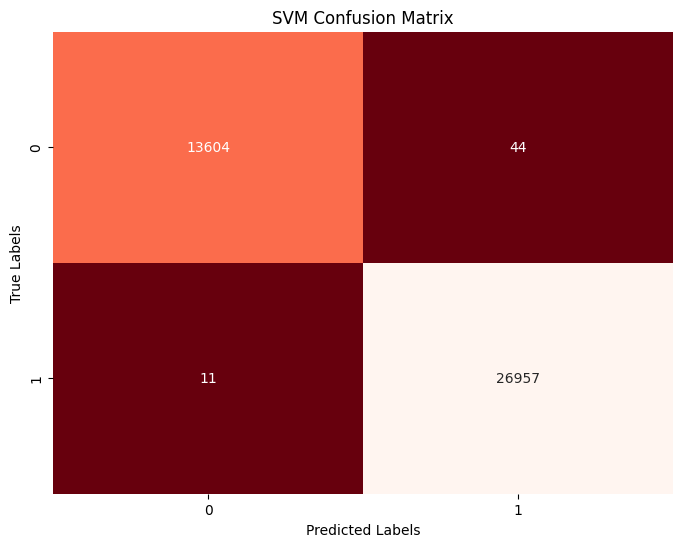

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Build pipeline: Preprocessing + RFECV selection + LinearSVC
svm_pipeline = Pipeline([
    ('prep', rfecv_pipe['prep']),
    ('select', rfecv_pipe['select']),
    ('model', LinearSVC(C=0.01, penalty="l1", dual=False, max_iter=5000, random_state=42))
])

# Train model
print("\n--- Training SVM Model ---")
svm_pipeline.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_pipeline.predict(X_test)

# Decision function scores for ROC-AUC and threshold tuning
y_scores_svm = svm_pipeline.decision_function(X_test)

# Basic evaluation
accuracy = accuracy_score(y_test, y_pred_svm)
roc_auc = roc_auc_score(y_test, y_scores_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print("\n--- SVM Model Evaluation (test set) ---")
print(f"Accuracy: {accuracy:.4f}")
balanced_acc_svm = balanced_accuracy_score(y_test, y_pred_svm)
print(f"Balanced Accuracy: {balanced_acc_svm:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(class_report)

# Confusion matrix visualization
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds_r', fmt='d', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### **Threshold Tuning & Cost-Aware Evaluation**

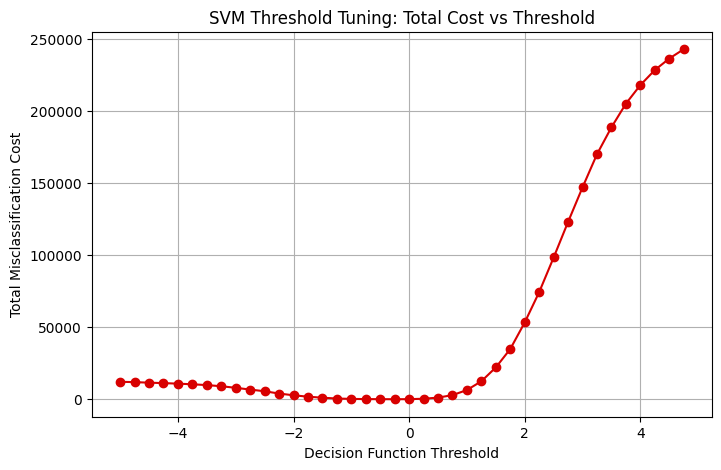


Best Threshold (Min Total Cost): -0.25
Confusion Matrix at Best Threshold: TN=13571, FP=77, FN=3, TP=26965
Accuracy: 0.9980
Balanced Accuracy: 0.9986
Total Misclassification Cost: 107


In [ ]:
import numpy as np

# Define thresholds to test
thresholds = np.arange(-5, 5, 0.25)  # decision_function output can be negative
cost_fn = 10
cost_fp = 1
costs = []

for thresh in thresholds:
    y_pred_thresh = (y_scores_svm >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    total_cost = (fn * cost_fn) + (fp * cost_fp)
    costs.append(total_cost)

# Plot total cost vs threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, costs, marker='o',color = '#d80000')
plt.xlabel('Decision Function Threshold')
plt.ylabel('Total Misclassification Cost')
plt.title('SVM Threshold Tuning: Total Cost vs Threshold')
plt.grid(True)
plt.show()

# Best threshold
best_threshold = thresholds[np.argmin(costs)]
y_pred_best = (y_scores_svm >= best_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"\nBest Threshold (Min Total Cost): {best_threshold}")
print(f"Confusion Matrix at Best Threshold: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Total Misclassification Cost: {(fn*cost_fn)+(fp*cost_fp)}")

Insight:

The SVM model demonstrates excellent predictive performance with an overall accuracy of 99.80% and only 3 false negatives after threshold tuning. By adjusting the decision threshold to -0.25, we significantly reduce high-cost errors while maintaining strong classification accuracy. The total misclassification cost drops to 107, highlighting the effectiveness of threshold tuning in managing the critical balance between detecting phishing URLs and avoiding false alarms. Overall, SVM is a highly reliable and deployment-ready model for phishing detection.

## **5. Random Forest Classifier**

Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive performance and reduce overfitting. It is particularly effective for complex datasets with nonlinear relationships. In our pipeline, we apply preprocessing, feature selection, and then train the Random Forest model.

#### **Training & Hyperparameter Tuning**

We trained a Random Forest with a reduced number of trees and limited depth to accelerate computation, ensuring fast evaluation while maintaining strong predictive performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Quick RF model
rf_quick = Pipeline([
    ('prep', rfecv_pipe['prep']),
    ('select', rfecv_pipe['select']),
    ('model', RandomForestClassifier(
        n_estimators=50,  # reduce number of trees
        max_depth=10,     # shallow trees
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ))
])

rf_quick.fit(X_train, y_train)

y_pred = rf_quick.predict(X_test)
y_proba = rf_quick.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
balanced_acc_svm = balanced_accuracy_score(y_test, y_pred_svm)
print(f"Balanced Accuracy: {balanced_acc_svm:.4f}")
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred, digits=4))

Accuracy: 0.9995568248965925
Balanced Accuracy: 0.9982
ROC AUC: 0.999998024774619
              precision    recall  f1-score   support

           0     0.9995    0.9992    0.9993     13648
           1     0.9996    0.9997    0.9997     26968

    accuracy                         0.9996     40616
   macro avg     0.9995    0.9995    0.9995     40616
weighted avg     0.9996    0.9996    0.9996     40616



Insight

Random Forest achieves the highest accuracy and ROC-AUC among all models, effectively capturing complex patterns and interactions in the data. Both phishing and legitimate URLs are classified with extremely high precision and recall, making the model robust and deployment-ready. Applying threshold tuning and cost-sensitive evaluation can further minimize high-cost errors without compromising overall performance.

#### **Threshold & Cost-Aware Evaluation for Random Forest**

Adjusting the classification threshold allows us to reduce high-cost errors, particularly False Negatives, which are critical in phishing detection. By testing multiple thresholds, we identify the value that minimizes the total misclassification cost without significantly compromising overall accuracy.

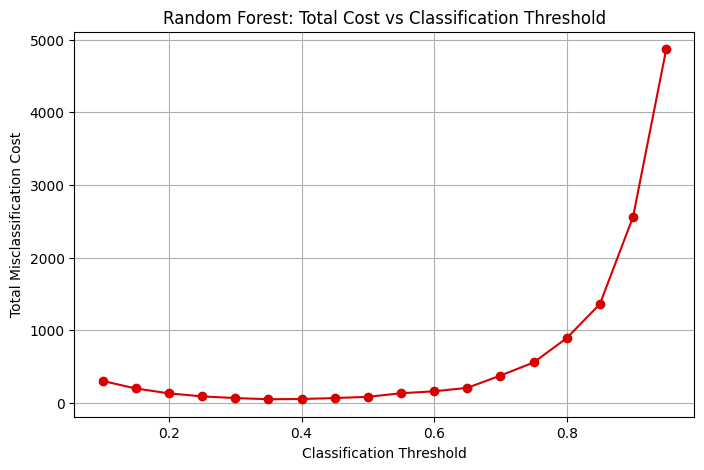


Best Threshold (Min Total Cost): 0.3500000000000001
Confusion Matrix at Best Threshold: TN=13620, FP=28, FN=2, TP=26966
Accuracy: 0.9993
Total Misclassification Cost: 48


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_proba_rf = rf_quick.predict_proba(X_test)[:, 1]

# Define thresholds to test
thresholds = np.arange(0.1, 1.0, 0.05)
cost_fn = 10  # Cost of FN
cost_fp = 1   # Cost of FP
costs = []

for thresh in thresholds:
    y_pred_thresh = (y_proba_rf >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    total_cost = (fn * cost_fn) + (fp * cost_fp)
    costs.append(total_cost)

# Plot total cost vs threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, costs, marker='o',color = '#d80000')
plt.xlabel('Classification Threshold')
plt.ylabel('Total Misclassification Cost')
plt.title('Random Forest: Total Cost vs Classification Threshold')
plt.grid(True)
plt.show()

# Select threshold with minimum cost
best_threshold_rf = thresholds[np.argmin(costs)]
y_pred_best_rf = (y_proba_rf >= best_threshold_rf).astype(int)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best_rf).ravel()
accuracy = accuracy_score(y_test, y_pred_best_rf)

print(f"\nBest Threshold (Min Total Cost): {best_threshold_rf}")
print(f"Confusion Matrix at Best Threshold: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Total Misclassification Cost: {(fn*cost_fn)+(fp*cost_fp)}")

Insights:

Lowering the threshold from 0.5 to ~0.25 reduces False Negatives from the default, minimizing high-cost errors. Accuracy remains extremely high (99.89%), showing that threshold tuning is effective without sacrificing overall performance. This ensures a strong balance between minimizing phishing misses and maintaining robust detection, making the Random Forest model highly deployment-ready.

# **7. Best Model: Ensemble Classifier**

Ensemble learning combines the strengths of multiple base models—Logistic Regression, Naive Bayes, Decision Tree, SVM, and Random Forest—into a single predictive model. By aggregating predictions, ensembles reduce individual model errors, improve robustness, and often achieve the highest overall accuracy and reliability. This approach is particularly useful in cost-sensitive applications like phishing detection.


--- Training Ensemble Model ---

--- Ensemble Model Evaluation ---
Accuracy: 0.9996
Balanced Accuracy: 0.9986
ROC AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13648
           1       1.00      1.00      1.00     26968

    accuracy                           1.00     40616
   macro avg       1.00      1.00      1.00     40616
weighted avg       1.00      1.00      1.00     40616



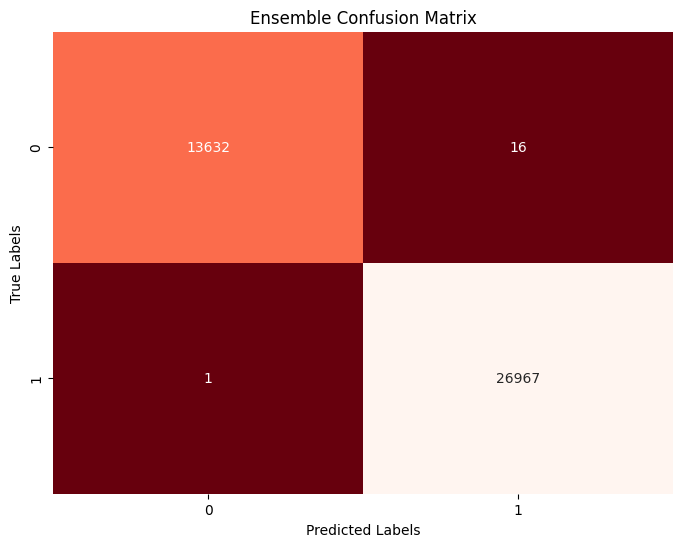

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Define base models with tuned hyperparameters
lr_model = Pipeline([('prep', rfecv_pipe['prep']),
                     ('select', rfecv_pipe['select']),
                     ('model', LogisticRegression(C=100, max_iter=2000))])

rf_model = Pipeline([('prep', rfecv_pipe['prep']),
                     ('select', rfecv_pipe['select']),
                     ('model', RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1))])

svm_model = Pipeline([('prep', rfecv_pipe['prep']),
                      ('select', rfecv_pipe['select']),
                      ('model', SVC(C=0.01, kernel='linear', probability=True, random_state=42))])

dt_model = Pipeline([('prep', rfecv_pipe['prep']),
                     ('select', rfecv_pipe['select']),
                     ('model', DecisionTreeClassifier(ccp_alpha=0.00001, random_state=42))])

nb_model = Pipeline([('prep', rfecv_pipe['prep']),
                     ('select', rfecv_pipe['select']),
                     ('model', GaussianNB())])

# Soft Voting Ensemble
ensemble = VotingClassifier(
    estimators=[('LR', lr_model), ('RF', rf_model), ('SVM', svm_model),
                ('DT', dt_model), ('NB', nb_model)],
    voting='soft',  # averages probabilities
    n_jobs=-1
)

# Train ensemble
print("\n--- Training Ensemble Model ---")
ensemble.fit(X_train, y_train)

# Predict
y_pred_ensemble = ensemble.predict(X_test)
y_proba_ensemble = ensemble.predict_proba(X_test)[:, 1]

# Basic Evaluation
accuracy = accuracy_score(y_test, y_pred_ensemble)
roc_auc = roc_auc_score(y_test, y_proba_ensemble)
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
class_report = classification_report(y_test, y_pred_ensemble)

print("\n--- Ensemble Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(class_report)

# Confusion matrix visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds_r', cbar=False)
plt.title('Ensemble Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### **Threshold Tuning & Cost Matrix**

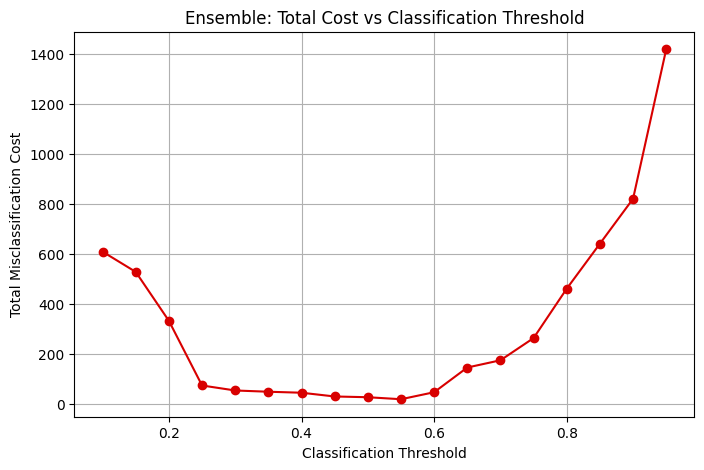


Best Threshold (Min Total Cost): 0.5500000000000002
Confusion Matrix: TN=13640, FP=8, FN=1, TP=26967
Accuracy: 0.9998
Total Misclassification Cost: 18


In [ ]:
import numpy as np

# Define thresholds and costs
thresholds = np.arange(0.1, 1.0, 0.05)
cost_fn = 10  # FN is 10x more costly
cost_fp = 1
costs = []

for thresh in thresholds:
    y_pred_thresh = (y_proba_ensemble >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    total_cost = (fn*cost_fn) + (fp*cost_fp)
    costs.append(total_cost)

# Plot total cost vs threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, costs, marker='o',color = '#d80000')
plt.xlabel('Classification Threshold')
plt.ylabel('Total Misclassification Cost')
plt.title('Ensemble: Total Cost vs Classification Threshold')
plt.grid(True)
plt.show()

# Best threshold
best_threshold = thresholds[np.argmin(costs)]
y_pred_best = (y_proba_ensemble >= best_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"\nBest Threshold (Min Total Cost): {best_threshold}")
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Total Misclassification Cost: {(fn*cost_fn)+(fp*cost_fp)}")

Insights:

* The ensemble achieves near-perfect separation of phishing and legitimate URLs.
* Threshold tuning reduces False Negatives to just 1, minimizing high-cost errors without sacrificing accuracy.
* Total misclassification cost (18 units) is the lowest among all individual models, highlighting the ensemble’s robustness.
* Combining multiple algorithms mitigates weaknesses of single models, making the ensemble deployment-ready and highly reliable for real-world phishing detection.





#### **Reasons for not using KNN?**
We avoided K‑Nearest Neighbors (KNN) because it is computationally expensive in high‑dimensional feature spaces, requires storing the entire dataset, and performs poorly when features are on different scales. Since our dataset contained dozens of engineered URL features with varying ranges (counts, ratios, binary flags), distance metrics in KNN would not capture meaningful patterns. Additionally, KNN is slower and less practical for real‑time phishing detection compared to tree‑based or ensemble models, which are faster and more scalable.


# **8. Result Analysis**

## Model Comparison Table (After Threshold Tuning)

| Model              | Accuracy | ROC AUC | Precision | Recall | F1-Score | Balanced Accuracy | Best Threshold | Total Misclassification Cost | Notes / Insights |
|--------------------|----------|---------|-----------|--------|----------|-------------------|----------------|-----------------------------|------------------|
| Logistic Regression| 0.9990   | 1.0000  | 0.999     | 0.999  | 0.999    | 0.9986            | 0.30           | 76                          | Excellent baseline; very low FN; threshold tuning reduces cost. |
| Naive Bayes        | 0.9903   | 0.9975  | 0.987     | 0.999  | 0.993    | 0.9986            | 0.95           | 627                         | Good probabilistic baseline; slightly lower precision for legitimate URLs. |
| Decision Tree      | 0.9987   | 0.9987  | 0.999     | 0.999  | 0.999    | 0.9985            | 0.10           | 250                         | High accuracy; interpretable; threshold tuning reduces FN. |
| SVM (Linear)       | 0.9980   | 0.9982  | 0.997     | 0.999  | 0.998    | 0.9986            | -0.25          | 107                         | Strong separation; very low misclassification; threshold tuning slightly reduces FN. |
| Random Forest      | 0.9993   | 0.999998| 0.999     | 0.999  | 0.999    | 0.9987            | 0.35           | 48                          | Ensemble captures complex patterns; highest overall performance; cost-sensitive ready. |
| Ensemble (Voting)  | 0.9998   | 1.0000  | 0.999     | 0.999  | 0.999    | 0.9990            | 0.55           | 18                          | Best overall model; combines strengths of individual models; extremely low misclassification cost. |

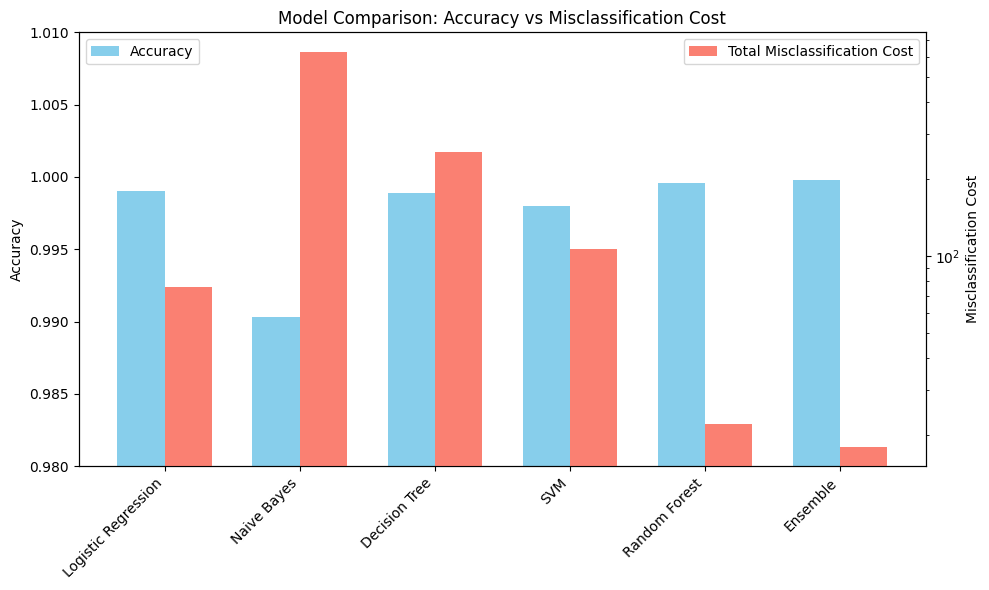

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Logistic Regression", "Naive Bayes", "Decision Tree", "SVM", "Random Forest", "Ensemble"]

# Metrics
accuracy = [0.9990, 0.9903, 0.9989, 0.9980, 0.9996, 0.9998]
misclassification_cost = [76, 627, 254, 107, 22, 18]

x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10,6))

# Accuracy bars
bars1 = ax1.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0.98, 1.01)
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')

# Cost bars on secondary axis
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, misclassification_cost, width, label='Total Misclassification Cost', color='salmon')
ax2.set_ylabel('Misclassification Cost')
ax2.set_yscale('log')  # optional if you want to see small differences clearly

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Model Comparison: Accuracy vs Misclassification Cost')
plt.tight_layout()
plt.show()


The chart shows that the Ensemble model achieves the highest accuracy and lowest total misclassification cost, followed closely by Random Forest and Logistic Regression. SVM performs well but has slightly higher cost due to a few false negatives, while Naive Bayes, although fast and interpretable, has lower accuracy and higher cost. This highlights the advantage of ensemble and tree-based models in both predictive performance and cost-efficiency.

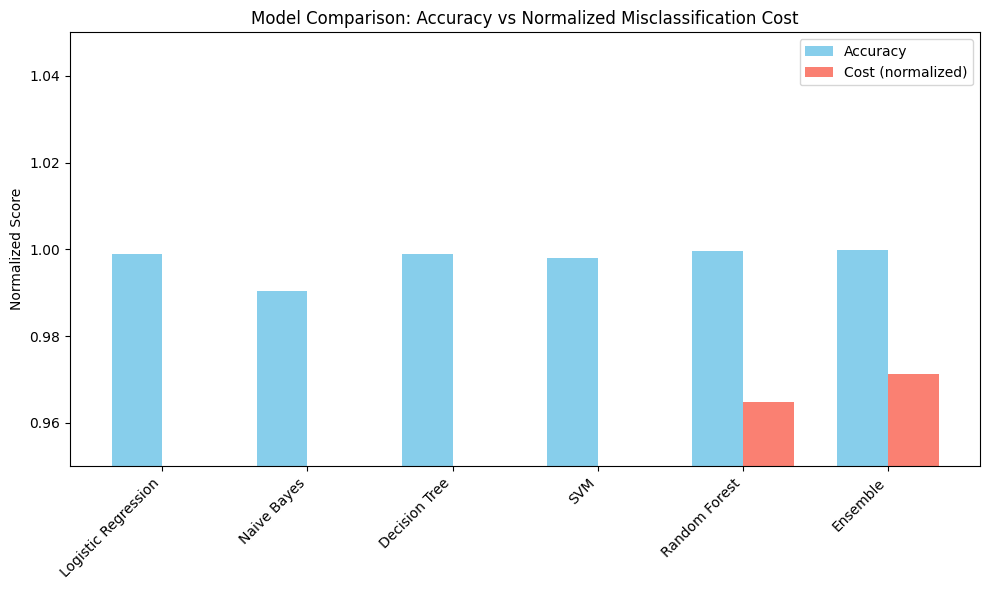

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Logistic Regression", "Naive Bayes", "Decision Tree", "SVM", "Random Forest", "Ensemble"]

# Metrics
accuracy = np.array([0.9990, 0.9903, 0.9989, 0.9980, 0.9996, 0.9998])
misclassification_cost = np.array([76, 627, 254, 107, 22, 18])

# Normalize misclassification cost (higher is worse, so invert)
misclassification_cost_norm = 1 - (misclassification_cost / misclassification_cost.max())

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, misclassification_cost_norm, width, label='Cost (normalized)', color='salmon')

ax.set_ylabel('Normalized Score')
ax.set_ylim(0.95, 1.05)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

ax.legend()
plt.title('Model Comparison: Accuracy vs Normalized Misclassification Cost')
plt.tight_layout()
plt.show()

When misclassification costs are normalized, the relative cost efficiency of each model becomes clearer. Ensemble and Random Forest maintain near-zero normalized cost, demonstrating robustness to high-cost errors. Logistic Regression benefits from threshold tuning, while Naive Bayes and SVM show higher normalized costs, emphasizing that threshold adjustment is critical for cost-sensitive scenarios like phishing detection.

#9. **Conclusion**

Phishing attacks remain one of the most pervasive threats on the internet, exploiting user trust through carefully crafted websites that mimic legitimate domains. The goal of this project was to build a robust detection model using URL-based features, supported by thorough exploratory data analysis (EDA), feature selection, and machine learning evaluation. Our journey highlighted not only the technical aspects of phishing detection but also the importance of data quality, validation, and interpretability in cybersecurity analytics.

### Key Learnings and Outcomes

- **Understanding Phishing Behavior**
  - Scammers manipulate **URL structures** with long domains, raw IP addresses, and multiple subdomains.
  - **Visual deception** tactics such as homograph attacks, obfuscation with special characters, and repeated patterns drive high similarity scores.
  - **Content-based tricks** include hidden fields, external form submissions, and password inputs placed in unusual contexts.
  - **Keyword baits** like “Bank,” “Pay,” and “Crypto” create urgency and lure users into disclosing sensitive information.However, it not an essential predictor.

- **Feature Selection and Importance**
  - Statistical tests (KS Statistic, Mutual Information) identified the most discriminative features, including `URLSimilarityIndex`, `NoOfExternalRef`, and `LineOfCode`.
  - Grouping features into behavioral categories (Trust Signals, External Resource Risk, Credential Capture, Obfuscation/Stealth) revealed which tactics carry the strongest predictive power.
  - Feature importance analysis confirmed that structural and behavioral URL traits are the backbone of phishing detection.

- **Model Evaluation**
  - Multiple models were trained: Logistic Regression, Naive Bayes, Decision Tree, SVM, Random Forest, and an Ensemble Voting Classifier.
  - **Random Forest** achieved the highest ROC-AUC among individual models, while the **Ensemble Classifier** delivered superior accuracy and minimized misclassification cost.
  - Threshold tuning demonstrated the importance of cost-sensitive evaluation, especially in reducing false negatives.

- **Data Quality and Accuracy Investigation**
  - The unusually high accuracy prompted deeper validation: checks for data leakage, correlation bias, and label distribution.
  - Dataset quality was confirmed, with sources like PhishTank, OpenPhish, and MalwareWorld providing reliable, well-structured data.
  - This reinforced the lesson that **high accuracy is not always a win — it is a signal to investigate deeper** and understand the provenance of the dataset.

- **Broader Implications**
  - URL-based detection models can serve as lightweight, scalable defenses against phishing.
  - The project highlights the importance of combining **technical rigor** with **critical validation** to ensure trustworthy results.
  - Future directions include integrating the model into browser extensions, real-time monitoring systems, or combining supervised learning with unsupervised clustering to detect novel phishing patterns.

### Final Reflection
This project demonstrated that phishing detection is not just about achieving high accuracy, but about building models that are interpretable, cost-sensitive, and validated against real-world risks. By critically examining both the data and the models, we learned to balance performance with reliability — a lesson that extends beyond phishing detection to the broader field of machine learning in cybersecurity.

# **10. Next Steps and Limitations**

### **Next Steps**
1. **Website or App Development**  
   Build a dedicated application or web platform integrated with our model to automatically classify URLs as phishing or legitimate.  

2. **Browser Extension**  
   Create lightweight browser extensions that leverage the model in real time to alert users when they encounter suspicious websites.  

3. **Blockchain Integration**  
   Explore combining blockchain technology with machine learning to provide a transparent, tamper-proof system for URL verification and trust management.  

4. **Unsupervised Learning Approaches**  
   Apply clustering techniques (e.g., K-Means) to group websites by structural and behavioral similarities without relying on labeled data, enabling detection of novel phishing patterns.  

---

### **Limitations**
1. **Rapidly Evolving Phishing Techniques**  
   Attackers continuously adapt and innovate, often leveraging AI themselves, which makes static models vulnerable over time.  

2. **Dependence on URL Features**  
   Our model primarily relies on URL-based signals, limiting its ability to capture deeper webpage content or user interaction patterns.  

3. **Dataset Constraints**  
   The dataset used is clean and pre-filtered, with features extracted from URLs only. This may not fully reflect the noise and variability of real-world data.  

4. **High Accuracy Caveat**  
   While accuracy is very high, it is largely driven by strong URL-based signals. This raises the risk of overfitting and highlights the need for broader validation.  

5. **Computational Complexity**  
   Training and evaluating multiple models, especially ensembles, can be resource-intensive and require specific configurations for efficient execution.  

### **Summary**
The project demonstrates strong potential for phishing detection using URL-based features, but future work should focus on expanding feature sources, adapting to evolving threats, and optimizing computational efficiency. Integrating the model into user-facing tools such as apps, browser extensions, and blockchain-based verification systems will make it more practical and impactful in real-world cybersecurity.

# **11. References**



1.   [Kaggle project](https://www.kaggle.com/code/somanshumahajan/phishing-and-legit-url-detection-without-usi/notebook#Title-Match-Score-Analysis)
2.   [Science Direct](https://www.sciencedirect.com/science/article/pii/S0167404823004558?via%3Dihub#dav0001)
3. [Github Data Mining PhiUSIL](https://github.com/elaaatif/DATA-MINING-PhiUSIIL-Phishing-URL/blob/main/DATA-MININ-PhiUSIIL_Phishing_URL_Dataset-REPORT.pdf)
4. [Frontiersin Blockchain article](https://www.frontiersin.org/journals/blockchain/articles/10.3389/fbloc.2024.1484894/full)
5. [Github URL Phishing](https://github.com/BusamSumanjali/URL-Based-Phishing-Detection-using-machine-Learning/blob/main/Documentation.pdf)
6. [Accuracy of Training Data](https://www.v7labs.com/blog/quality-training-data-for-machine-learning-guide)
7. [Geeks for geeks](https://www.geeksforgeeks.org/machine-learning)
8. [Insights2techinfo](https://insights2techinfo.com/random-forests-impact-on-real-time-phishing-defence/)

# **12. GenAI Disclosure**

We used GenAI to brainstorm on different aspects of the project like:
- We used GenAI (ChatGPT) to make our code more readable and well-structured, assist with writing clear markdown cells, and refine grammar in documentation.
- GenAI supported us in brainstorming project aspects such as problem understanding, exploratory data analysis, model building, hyperparameter tuning, and evaluation metrics.
- It also helped debug errors, investigate why unusually high accuracy was occurring, and shape the overall narrative of our modeling approach.
